<a href="https://colab.research.google.com/github/enotikusan/mastersky_enotikusan/blob/develop/Master_HH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование вакансий Дата-аналитик и Системный аналитик на портале HH

Необходимо изучить требования к вакансиям "Дата-аналитик" и "Системный аналитик".

Данные о вакансиях получены с портала HH. Набор данных содержит информацию о работодателе, описание вакансии, требуемый опыт работы, необходимые навыки, типе занятости, графике работы и оплаты труда.

**Цель исследования:**
1. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.
2. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.
3. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Анализ необходимо провести отдельно для грейдов Junior, Junior+, Middle, Senior.
4. Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
5. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Анализ необходимо провести отдельно для грейдов Junior, Junior+, Middle, Senior.


### Шаг 1. Ознакомление с данными

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [ ]:
# Считываем данные из csv-файла и сохраняем в переменные
try:
   vacancies_sa = pd.read_excel('/content/vacancies_sa.xlsx')
   vacancies_da = pd.read_excel('/content/vacancies_da (1).xlsx')
except:
   vacancies_sa = pd.read_excel('/https://code.s3.yandex.net/content/vacancies_sa.xlsx')
   vacancies_da = pd.read_excel('/https://code.s3.yandex.net/content/vacancies_da (1).xlsx')


In [ ]:
# Выводим первые 20 записей датафрейма vacancies_da на экран
display(vacancies_da.head(20))
vacancies_da.info()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",Удаленная работа,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",Полный день,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность"
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],Полный день,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.0,NaN,ЗП не указана,NaN,NaN,NaN
9,100071014,Аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,пао «россети урал» — крупнейшая электросетевая...,россеть урал крупный электросетевой компания у...,510

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [ ]:
# Выводим первые 20 записей датафрейма vacancies_sa на экран
display(vacancies_sa.head(20))
vacancies_sa.info()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN
5,100065546,Системный аналитик ЦФТ-Банк,2024-07-09 10:42:25,https://hh.ru/vacancy/100065546,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,Junior+ (1-3 years),"['MS SQL', 'Документация', 'ЦФТ', 'BPMN']",Удаленная работа,Полная занятость,ищем системного аналитика цфт! в небольшую ски...,искать системный аналитик цфт небольшой скилло...,NaN,NaN,ЗП не указана,"ЦФТ, BPMN, MS SQL",NaN,Документация
6,100083149,Системный аналитик 1С ERP,2024-07-08 09:25:24,https://hh.ru/vacancy/100083149,Открытая,Simple,Simple. Дирекция по информационным технологиям,Санкт-Петербург,Junior+ (1-3 years),"['Системный анализ', '1С ERP Битфинанс', 'Доку...",Удаленная работа,Полная занятость,команда ит реализует сложные и при этом интере...,команда ита реализовать сложный интересный про...,NaN,NaN,ЗП не указана,"Системный анализ, 1С ERP, 1С ERP Битфинанс",NaN,Документация
7,100099017,Системный аналитик,2024-07-04 12:31:59,https://hh.ru/vacancy/100099017,Открытая,Точка Качества,NaN,Санкт-Петербург,Junior+ (1-3 years),"['JSON', 'REST', 'SQL', 'XML', 'SOAP', 'Докуме...",Полный день,Полная занятость,компания «точка качества» – одна из самых дина...,компания точка качество динамично развивающийс...,NaN,NaN,ЗП не указана,"BPMN, UML, SQL, Системный анализ, Аналитическо...",confluence,"Документация, Проактивность"
8,100119249,Системный аналитик АБС в Банк,2024-07-08 10:26:20,https://hh.ru/vacancy/100119249,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,в управление развития и сопровождения приложен...,управление развитие сопровождение приложение о...,220000.0,NaN,ЗП не указана,NaN,NaN,Документация
9,100300836,Системный аналитик / горный инженер (геолог/те...,2024-07-08 09:00:57,https://hh.ru/vacancy/100300836,Открытая,Лаборатория Майнфр

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

***Выводы:***

1. Датафремы имеют одинаковую структуру и тип данных. Для удобство анализа объединим данные, предварительно добавив столбец с типом вакасии: da - Дата-аналитик; sa - Системный аналитик.

In [ ]:
# Добавляем столбец с типом вакансии
vacancies_da['v_type'] = 'da'
vacancies_sa['v_type'] = 'sa'
# Объединяем датафреймы
vacancies = pd.concat([vacancies_da, vacancies_sa])
# Выводим первые 20 записей датафрейма vacancies на экран
display(vacancies.head(20))
vacancies.info()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,v_type
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,da
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,da
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,da
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",...,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,da
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],...,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN,da
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",...,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",da
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],...,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.0,NaN,ЗП не указана,NaN,NaN,NaN,da
9,100071014,Аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],...,Полная занятость,пао «россети урал» — крупнейшая электросетевая...,россеть урал крупный электросетевой компания у...,51000.0,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,da

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 1914
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null   obj

**Вывод по разделу:**

1. Количество записей в объединенной таблице vacancies = 3 716, что соответствует сумме записей в исходных таблицах.
Следовательно, объединение данных выполнено без потерь.
2. Тип столбцов и их наименования корректны и не требуют внесения изменений.

### Шаг 2. Предобработка данных

In [ ]:
# Проверим наличие полных дубликатов в датафрейме
vacancies.duplicated().sum()

0

***Выводы:***

1. Полные дубликаты отсутствуют.
2. Так как одна и та же вакансия, может быть опубликована несколько раз, то следует поискать одинаковые записи с разной датой публикации.

In [ ]:
# Определеяем кол-во пропуском в датафрейме
vacancies.isna().sum().sort_values(ascending = False)

,0
salary_to,3209
salary_from,3012
department,2834
hard_skills_from_description,2728
soft_skills_from_description,1701
key_skills_from_key_skills_field,1349
id,0
employment,0
salary_bin,0
description_lemmatized,0


In [ ]:
# Определяем кол-во дубликатов по идентификатору записи
vacancies.duplicated(subset=['id']).sum()

5

In [ ]:
# Найдем дубликаты по идентификатору записи
vacancies.loc[vacancies.duplicated(subset=['id'], keep=False)].sort_values(by=['id','published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,v_type
344,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,da
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,sa
1461,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Системный анализ', 'DWH']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,da
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,sa
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,da
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,sa
103,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,da
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,sa
104,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,da
33,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерс

***Выводы:***

1. Так как дублирующие записи относятся к разным вакансиям: дата-аналитик и системный аналитик, то удалять их нельзя.
2. Осуществим поиск дубликатов по всем столбцам за исключением идентификатора записи и даты публикации. Возможно, при повторной публикации вакансии, у нее изменяется идентификатор

In [ ]:
# Поиск дубликатов по основным параметрам вакансии
vacancies.loc[vacancies.duplicated(subset=['name', 'type', 'employer', 'department','area',
                                           'experience', 'key_skills', 'schedule','employment',
                                           'description', 'salary_bin', 'type'],keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,v_type
1408,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
72,100463980,BI-аналитик/ Аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
631,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
528,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
1320,97741410,Data Analyst,2024-04-23 16:32:21,https://hh.ru/vacancy/97741410,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,96494928,Старший аналитик данных (маркетинг),2024-04-09 09:38:57,https://hh.ru/vacancy/96494928,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Middle (3-6 years),"['SQL', 'Python', 'Маркетинг, реклама, PR', 'М...",...,Полная занятость,чем предстоит заниматься: отслеживать и собир...,предстоять заниматься отслеживать собирать раз...,NaN,NaN,ЗП не указана,"Маркетинг, реклама, PR, аналитика данных, Pyth...",Pandas,NaN,da
819,95548988,Урбан-аналитик данных,2024-03-26 15:33:29,https://hh.ru/vacancy/95548988,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,da
1747,99737480,Урбан-аналитик данных,2024-06-08 17:13:09,https://hh.ru/vacancy/99737480,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,da
1302,97652565,Эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,Полная занятость,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,da


In [ ]:
# Поиск дубликатов по основным параметрам вакансии
vacancies.duplicated(subset=['name', 'type', 'employer', 'department','area',
                                           'experience', 'key_skills', 'schedule','employment',
                                           'description', 'salary_bin', 'type'],keep=False
    ).sum()

416

In [ ]:
# Удаляем дубликаты, найденны выше
vacancies = vacancies.drop_duplicates(subset=['name', 'type', 'employer', 'department','area',
                                           'experience', 'key_skills', 'schedule','employment',
                                           'description', 'salary_bin', 'type'],keep='last')

In [ ]:
# Проверяем внесенные изменения
vacancies.duplicated(subset=['name', 'type', 'employer', 'department','area',
                                           'experience', 'key_skills', 'schedule','employment',
                                           'description', 'salary_bin', 'type'],keep=False
    ).sum()

0

***Выводы:***

1. Удалены дубликаты (416) по всем столбцам за исключением идентификатора записи и даты публикации

In [ ]:
# Проанализируем значения столбца "Наименование вакансии"
vacancies['name'].value_counts().head(20)

,count
name,
Системный аналитик,564
Аналитик данных,409
Data Analyst,80
Системный аналитик 1С,62
Ведущий системный аналитик,48
Ведущий аналитик данных,27
Системный аналитик DWH,25
Старший системный аналитик,24
Data analyst,22


In [ ]:
# Посчитаем кол-во уникальных значений
vacancies['name'].nunique()

1574

***Выводы:***

1. Встречаются одинаковые наименования вакансий, указанные в разных регистрах. В целях определения грейда вакансии по её наименованию, приведем все записи к нижнему регистру.



In [ ]:
# Удалим лишние пробелы в начале и конце значения и приведем к нижнему регистру
vacancies['name'] = vacancies['name'].str.lower().str.strip()

In [ ]:
# Проверим внесенные изменения
vacancies['name'].nunique()

1479

In [ ]:
# Проанализируем значения столбца "Опыт работы"
vacancies['experience'].value_counts()

,count
experience,
Junior+ (1-3 years),1818
Middle (3-6 years),1410
Junior (no experince),211
Senior (6+ years),55


***Выводы:***

1. Не требуется вносить изменения в данное поле.

In [ ]:
# Проанализируем значения столбца "Категория зарплаты"
vacancies['salary_bin'].value_counts()

,count
salary_bin,
ЗП не указана,3003
От 100 тысяч до 200 тысяч,168
От 200 тысяч до 300 тысяч,115
Больше 300 тысяч,106
Меньше 100 тысяч,102


***Выводы:***

1. Не требуется вносить изменения в данное поле.

In [ ]:
# Проанализируем значения столбца "Типи занятости"
vacancies['employment'].value_counts()

,count
employment,
Полная занятость,3424
Стажировка,43
Частичная занятость,20
Проектная работа,7


***Выводы:***

1. Не требуется вносить изменения в данное поле.

**Вывод по разделу:**

1. Полные дубликаты отсутствуют.
2. Удалены дубликаты (416) по всем столбцам за исключением идентификатора записи и даты публикации
3. Наименование всех вакансий приведены к нижнему регистру, удалены лидирующий и замыкающий пробел.

### Шаг 3.1 Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом

In [ ]:
# Определяем ТОП-20 наименований вакансий
vacancies['name'].value_counts().head(20)

,count
name,
системный аналитик,572
аналитик данных,411
data analyst,102
системный аналитик 1с,62
ведущий системный аналитик,49
system analyst,36
ведущий аналитик данных,27
системный аналитик dwh,25
system analyst / системный аналитик,24


In [ ]:
# Добавляем столбец с описанием грейда в зависимости от наименования вакансии
vacancies.loc[((vacancies['name'] == 'junior data analyst')), 'grade_name'] = 'Junior'
vacancies.loc[vacancies['name'] == 'младший аналитик данных', 'grade_name'] = 'Junior+'

vacancies.loc[(
    (vacancies['name'] == 'системный аналитик') |
    (vacancies['name'] == 'аналитик данных') |
    (vacancies['name'] == 'data analyst') |
    (vacancies['name'] == 'cистемный аналитик 1c') |
    (vacancies['name'] == 'системный аналитик dwh') |
    (vacancies['name'] == 'старший системный аналитик') |
    (vacancies['name'] == 'system analyst') |
    (vacancies['name'] == 'system analyst / системный аналитик') |
    (vacancies['name'] == 'старший аналитик данных') |
    (vacancies['name'] == 'бизнес/системный аналитик') |
    (vacancies['name'] == 'системный аналитик (middle)') |
    (vacancies['name'] == 'data analyst / аналитик данных') |
    (vacancies['name'] == 'аналитик данных / data analyst')
                  ), 'grade_name'] = 'Middle'

vacancies.loc[(
    (vacancies['name'] == 'ведущий системный аналитик') |
    (vacancies['name'] == 'ведущий аналитик данных') |
    (vacancies['name'] == 'системный аналитик (senior)') |
    (vacancies['name'] == 'senior data analyst')
                  ), 'grade_name'] = 'Senior'

In [ ]:
# Проверяем заполняемость созданного столбца
vacancies['grade_name'].value_counts()

,count
grade_name,
Middle,1276
Senior,105
Junior+,20
Junior,11


In [ ]:
# Определяем значения в столбце "Опыт работы"
vacancies['experience'].value_counts()

,count
experience,
Junior+ (1-3 years),1818
Middle (3-6 years),1410
Junior (no experince),211
Senior (6+ years),55


In [ ]:
# Добавляем столбец с описанием грейда в зависимости от опыта работы
vacancies.loc[vacancies['experience'] == 'Middle (3-6 years)', 'grade'] = 'Middle'
vacancies.loc[vacancies['experience'] == 'Junior+ (1-3 years)', 'grade'] = 'Junior+'
vacancies.loc[vacancies['experience'] == 'Junior (no experince)', 'grade'] = 'Junior'
vacancies.loc[vacancies['experience'] == 'Senior (6+ years)', 'grade'] = 'Senior'

In [ ]:
# Проверяем заполняемость созданного столбца
vacancies['grade'].value_counts()

,count
grade,
Junior+,1818
Middle,1410
Junior,211
Senior,55


**Вывод по разделу:**

1. В датафремы добавлены следующие столбцы:
- grade_name - определение грейда на основании наименования вакансии.
- grade - определение грейда на основании опыта работы.
2. В дальнейшем будем использовать столбец grade по причинам:
- является более достоверным по сравнению с определением по наименованию вакансии.
- определен для всех записей датафрейма.


### Шаг 3.2 Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.

In [ ]:
# Подготавливаем данные для вакансии Дата-аналитик
grade_da = vacancies.query('v_type == "da"')
grade_da = pd.DataFrame(grade_da['grade'].value_counts()).reset_index()
display(grade_da)

,grade,count
0,Junior+,970
1,Middle,480
2,Junior,126
3,Senior,11


In [ ]:
# Подготавливаем данные для вакансии Системный аналитик
grade_sa = vacancies.query('v_type == "sa"')
grade_sa = pd.DataFrame(grade_sa['grade'].value_counts()).reset_index()
display(grade_sa)

,grade,count
0,Middle,930
1,Junior+,848
2,Junior,85
3,Senior,44


In [ ]:
# Cтроим диаграмму с сегментами для вакансии Дата-аналитик
fig = go.Figure(data=[go.Pie(labels=grade_da['grade'], # указываем значения, которые появятся на метках сегментов
                             values=grade_da['count'], # указываем данные, которые отобразятся на график
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Доля грейдов вакансии Дата-аналитик', # указываем заголовок графика
                  width=800, # Указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # Вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Грейд',
                                    showarrow=False)])
fig.show() # Выводим график

In [ ]:
# Cтроим диаграмму с сегментами для вакансии Системный аналитик
fig = go.Figure(data=[go.Pie(labels=grade_sa['grade'], # указываем значения, которые появятся на метках сегментов
                             values=grade_sa['count'], # указываем данные, которые отобразятся на график
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Доля грейдов вакансии Системный аналитик', # указываем заголовок графика
                  width=800, # Указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # Вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Грейд',
                                    showarrow=False)])
fig.show() # Выводим график

**Вывод по разделу:**

1. Для вакансий "Дата-аналитик" требования по уровню соискателей распределяются следующим образом (в порядке убывания):
- Junior+: 61.1%
- Middle: 30.2%
- Junior: 7.94%
- Senior: 0.693%
2. Для вакансий "Системный аналитик" требования по уровню соискателей распределяются следующим образом (в порядке убывания):
- Middle: 48.8%
- Junior+: 44.5%
- Junior: 4.46%
- Senior: 2.31%

3. Наибольший интерес к соискателем с уровнем Junior+ и Middle обусловлен тем, что большая базовых задач выполняется данными специалистами и обучение соискателя, возможно, кажется легче, чем переучивания и высокие требования по зарплате у уровня Senior.
4. Наименьший интерес к соискателем с уровнем Senior скорее всего связан с меньшим кол-вом специалистов данного уровня в командах и повышения специалистов, уже работающих в компании.

### Шаг 3.3 Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Анализ необходимо провести отдельно для грейдов Junior, Junior+, Middle, Senior.

#### Шаг 3.3.1 Определение типичного места работы для Аналитика данных и Системного аналитика по работодателю.

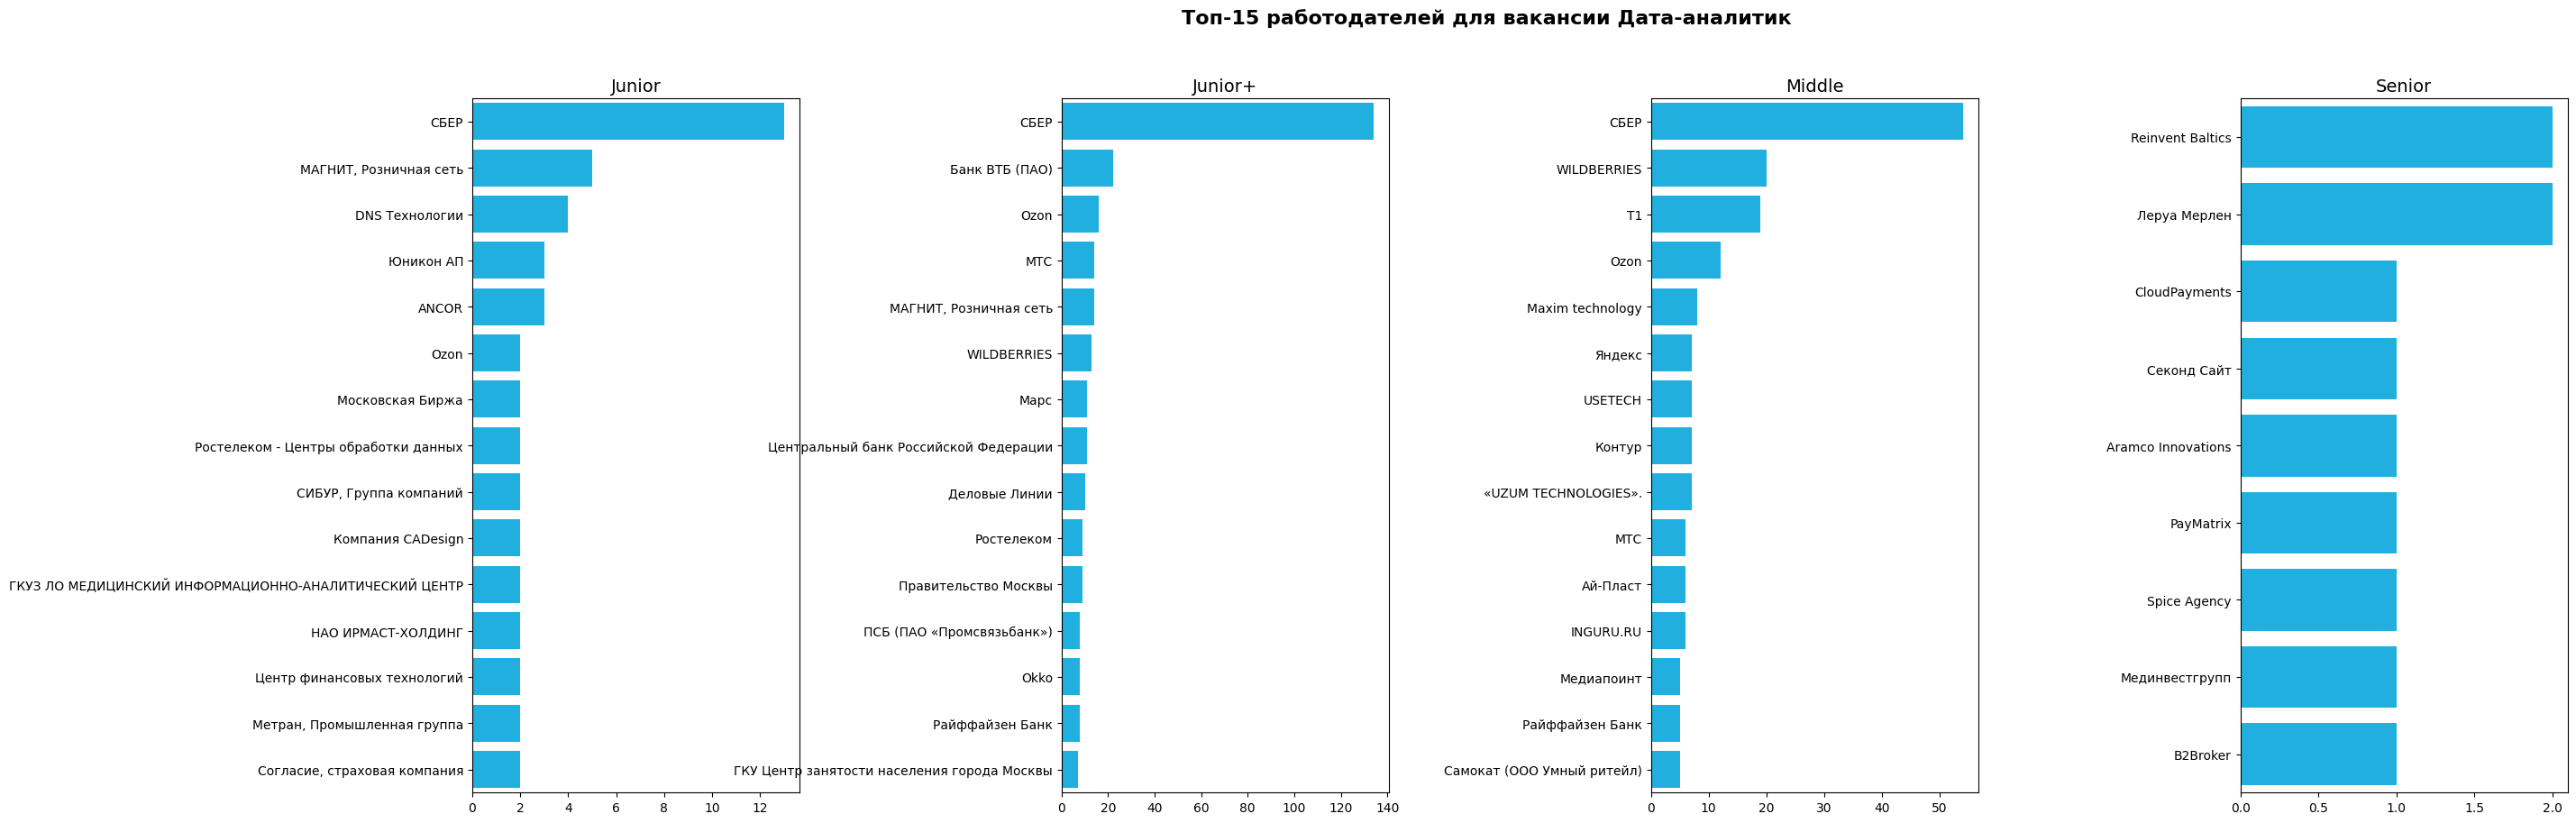

In [ ]:
# Построим диаграмму для вакансии Дата-аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Топ-15 работодателей для вакансии Дата-аналитик', fontsize=16, fontweight='bold')
grade = ['Junior','Junior+','Middle','Senior']
for i in range(len(grade)):
      da_TOP_15_emp = (vacancies.loc[(vacancies['v_type'] == 'da') & (vacancies['grade'] == f'{grade[i]}')
          , 'employer'].value_counts()).reset_index().head(15)

# Строим график
      sns.barplot(x='count', y='employer', data=da_TOP_15_emp, ax=ax[i],color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')


plt.subplots_adjust(wspace = 0.8)
plt.show()



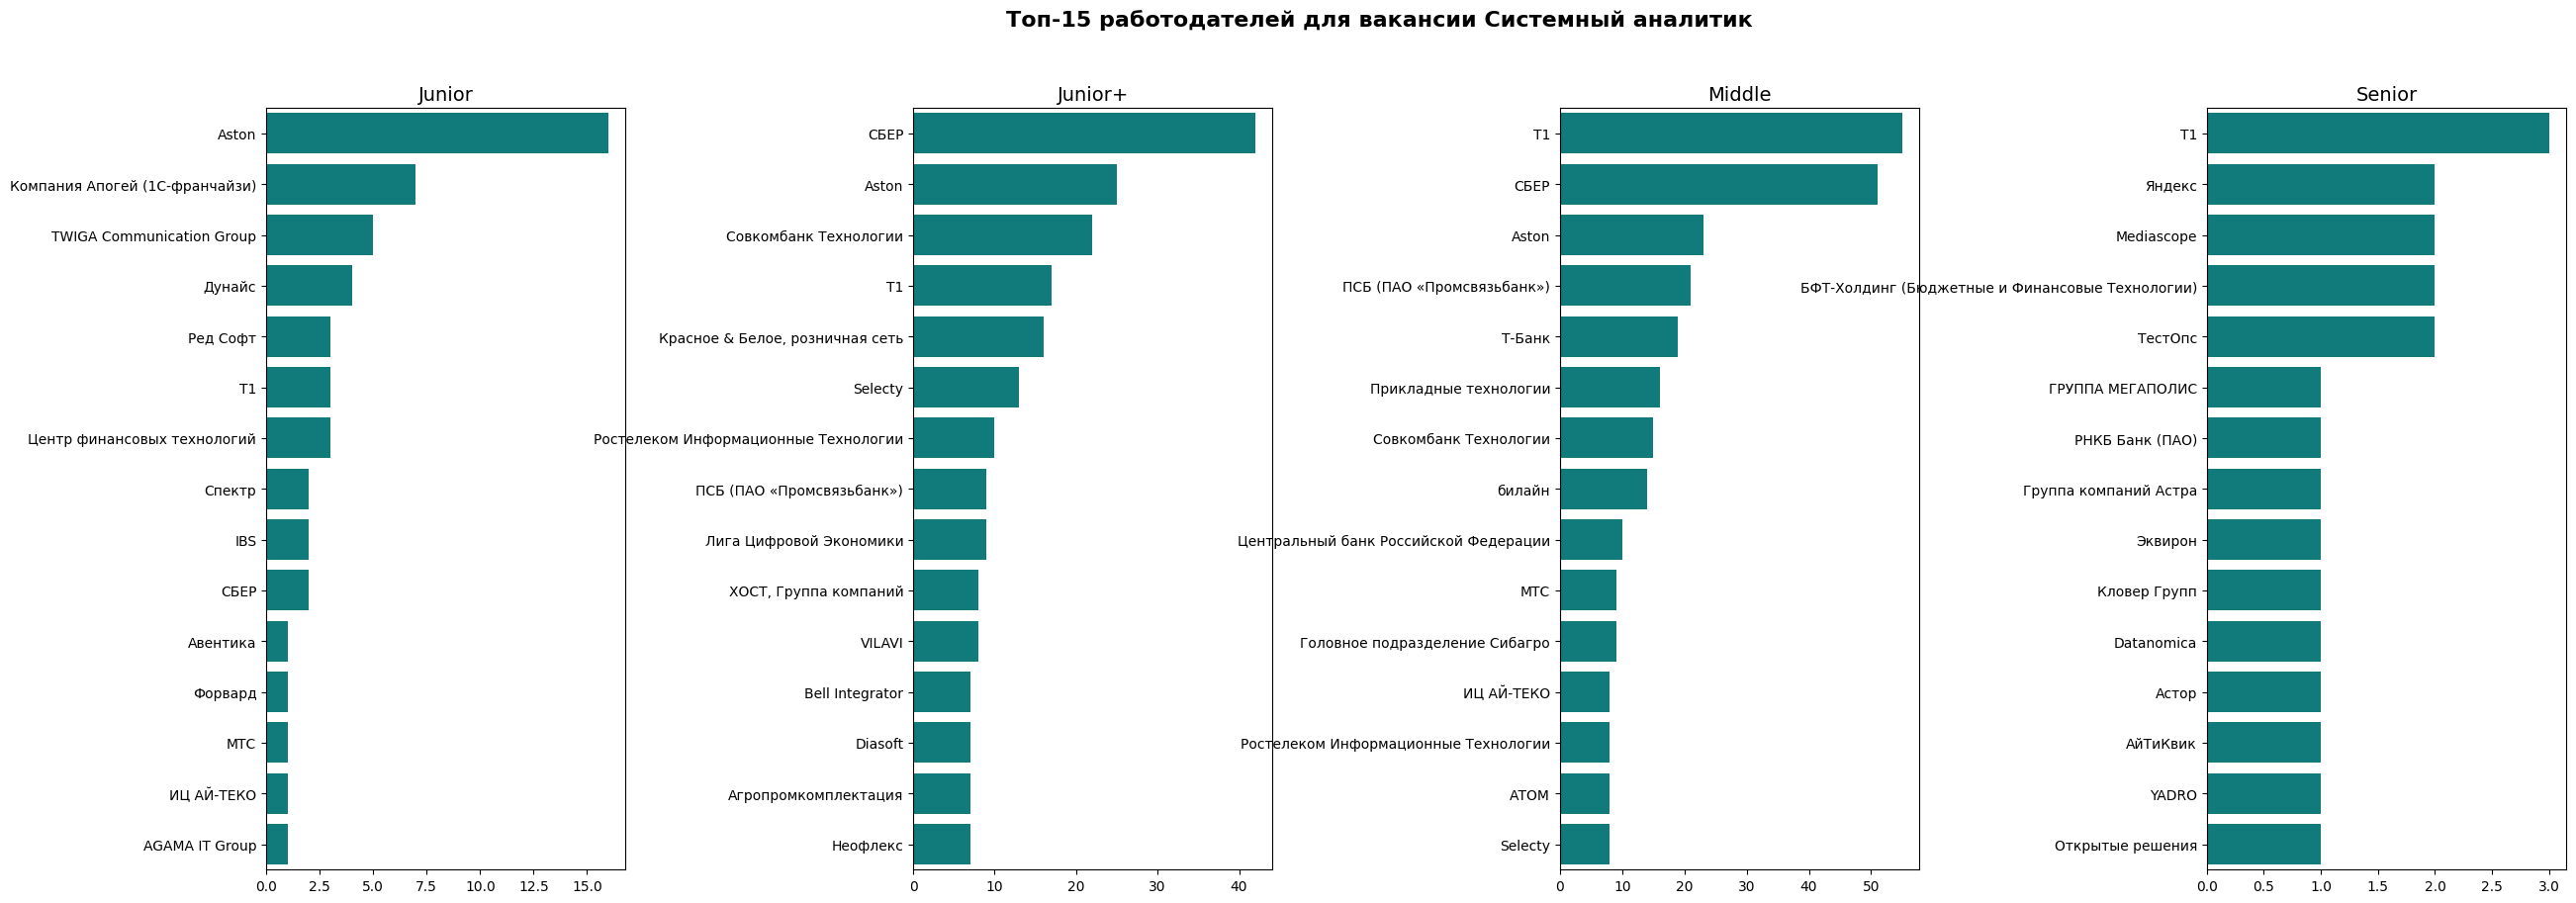

In [ ]:
# Построим диаграммы для вакансии Системный аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Топ-15 работодателей для вакансии Системный аналитик', fontsize=16, fontweight='bold')
grade = ['Junior','Junior+','Middle','Senior']
for i in range(len(grade)):
      sa_TOP_15_emp = (vacancies.loc[(vacancies['v_type'] == 'sa') & (vacancies['grade'] == f'{grade[i]}')
          , 'employer'].value_counts()).reset_index().head(15)


# Строим график
      sns.barplot(x='count', y='employer', data=sa_TOP_15_emp, ax=ax[i], color='#008B8B')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

**Вывод по подразделу:**

1. Вакансии "Дата-аналитик" уровня Junior более востребованы у компаний:
- СБЕР.
- МАГНИТ, Розничная сеть.
- DNS технологиии.

2. Вакансии "Дата-аналитик" уровня Junior+ более востребованы у компаний:
- СБЕР.
- Банк ВТБ (ПАО).
- OZON.

3. Вакансии "Дата-аналитик" уровня Middle более востребованы у компаний:
- СБЕР.
- Wildberries.
- T1.

4. Вакансии "Дата-аналитик" уровня Senior более востребованы у компаний:
- Reinvent Baltics.
- Леруа Мерлен.
- CloudPayments.

5. Вакансии "Системный аналитик" уровня Junior более востребованы у компаний:
- Aston.
- Компания Апогей (1С-франчайзи).
- TWIGA Communication Group.

6. Вакансии "Системный аналитик" уровня Junior+ более востребованы у компаний:
- СБЕР.
- Aston.
- Совкомбанк Технологии.

7. Вакансии "Системный аналитик" уровня Middle более востребованы у компаний:
- T1.
- СБЕР.
- Aston.

8. Вакансии "Системный аналитик" уровня Senior более востребованы у компаний:
- T1.
- Яндекс.
- Mediascope.

9. По кол-ву вакансий разных уровней специалистов лидирует СБЕР.
Второе место - T1, третье - Aston.

#### Шаг 3.3.2 Определение типичного места работы для Аналитика данных и Системного аналитика по зарплате.

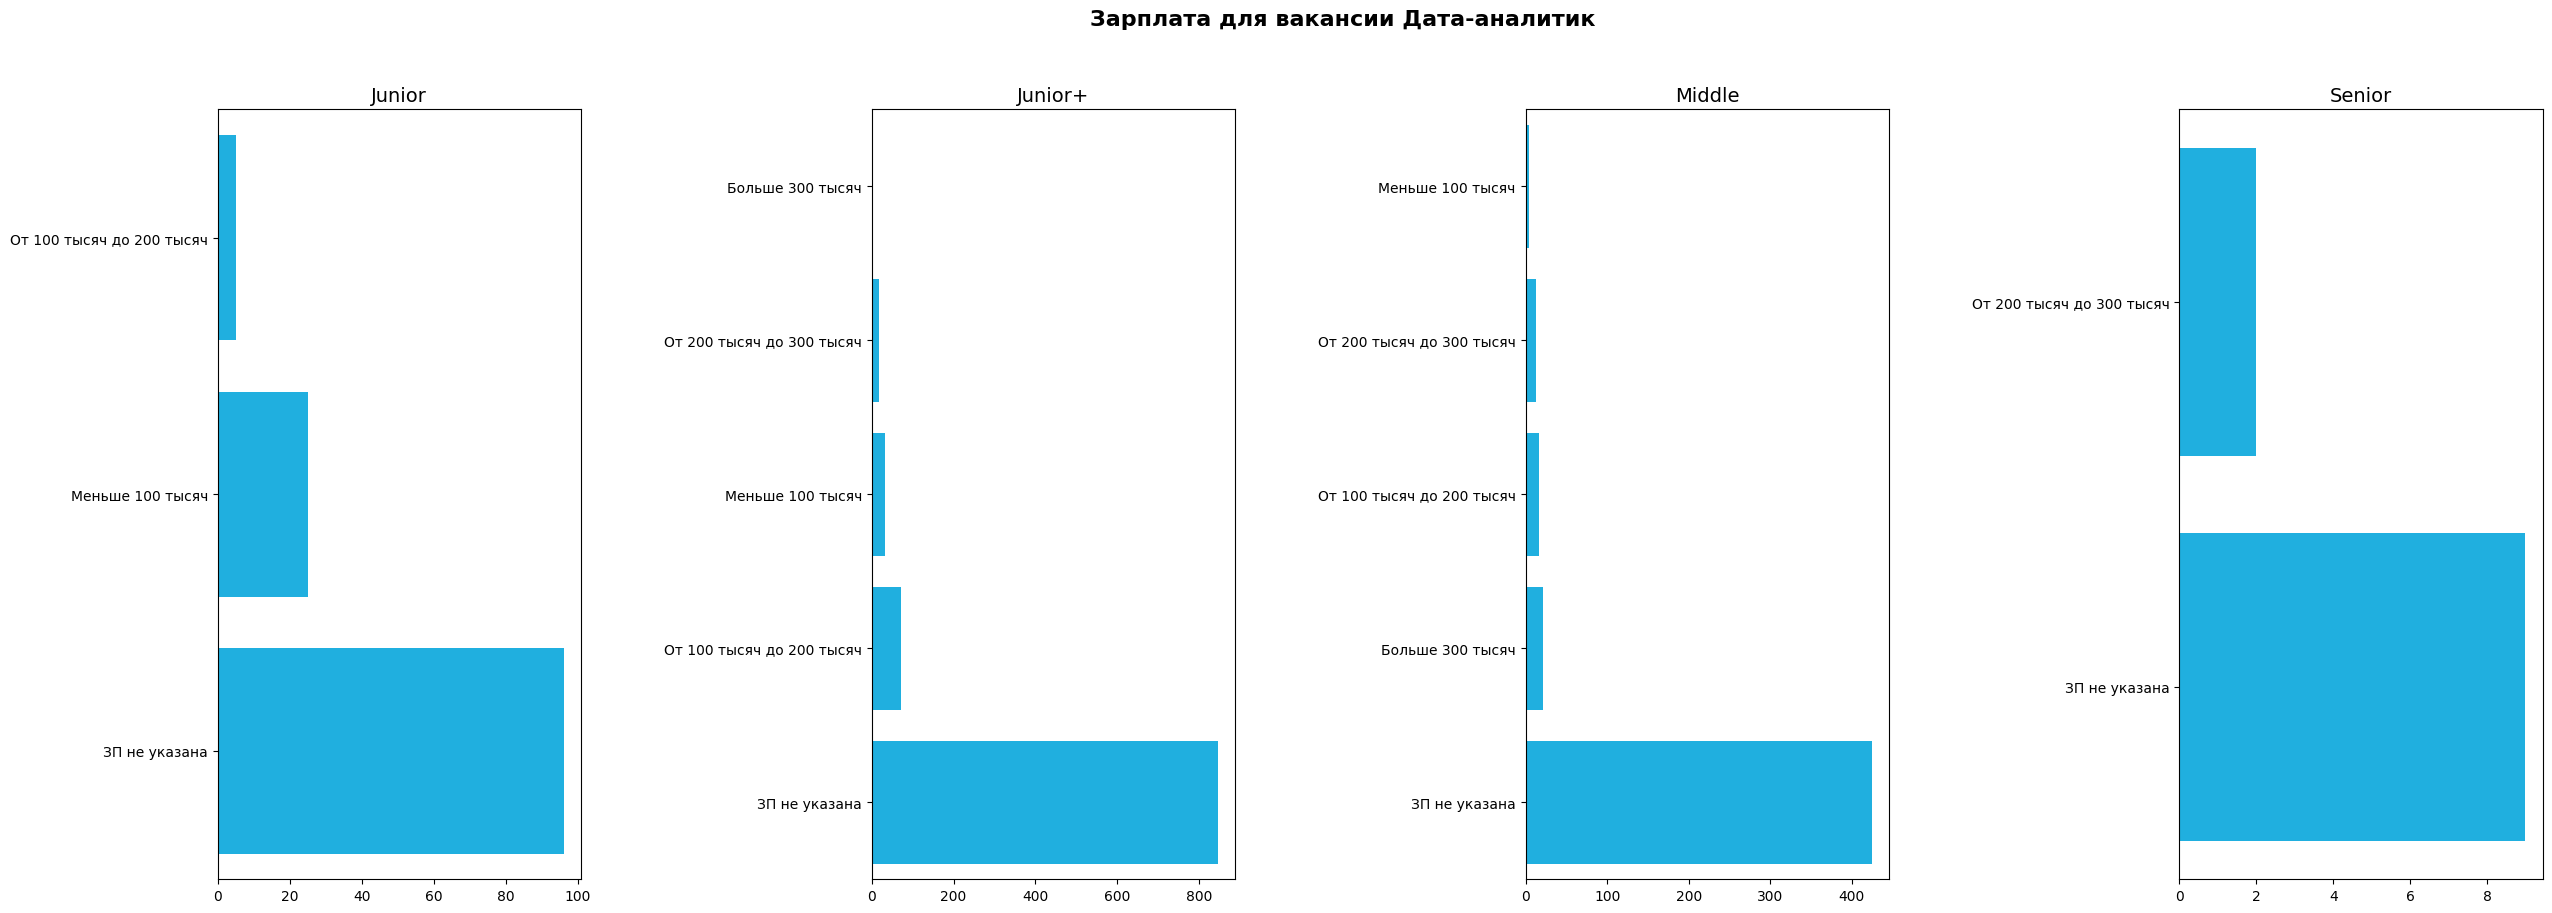

In [ ]:
# Построим диаграммы для вакансии Дата-аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Зарплата для вакансии Дата-аналитик', fontsize=16, fontweight='bold')
grade = ['Junior','Junior+','Middle','Senior']
for i in range(len(grade)):
      da_salary = (vacancies.loc[(vacancies['v_type'] == 'da') & (vacancies['grade'] == f'{grade[i]}')
          , 'salary_bin'].value_counts().sort_values()).reset_index()

# Строим график
      sns.barplot(x='count', y='salary_bin', data=da_salary, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

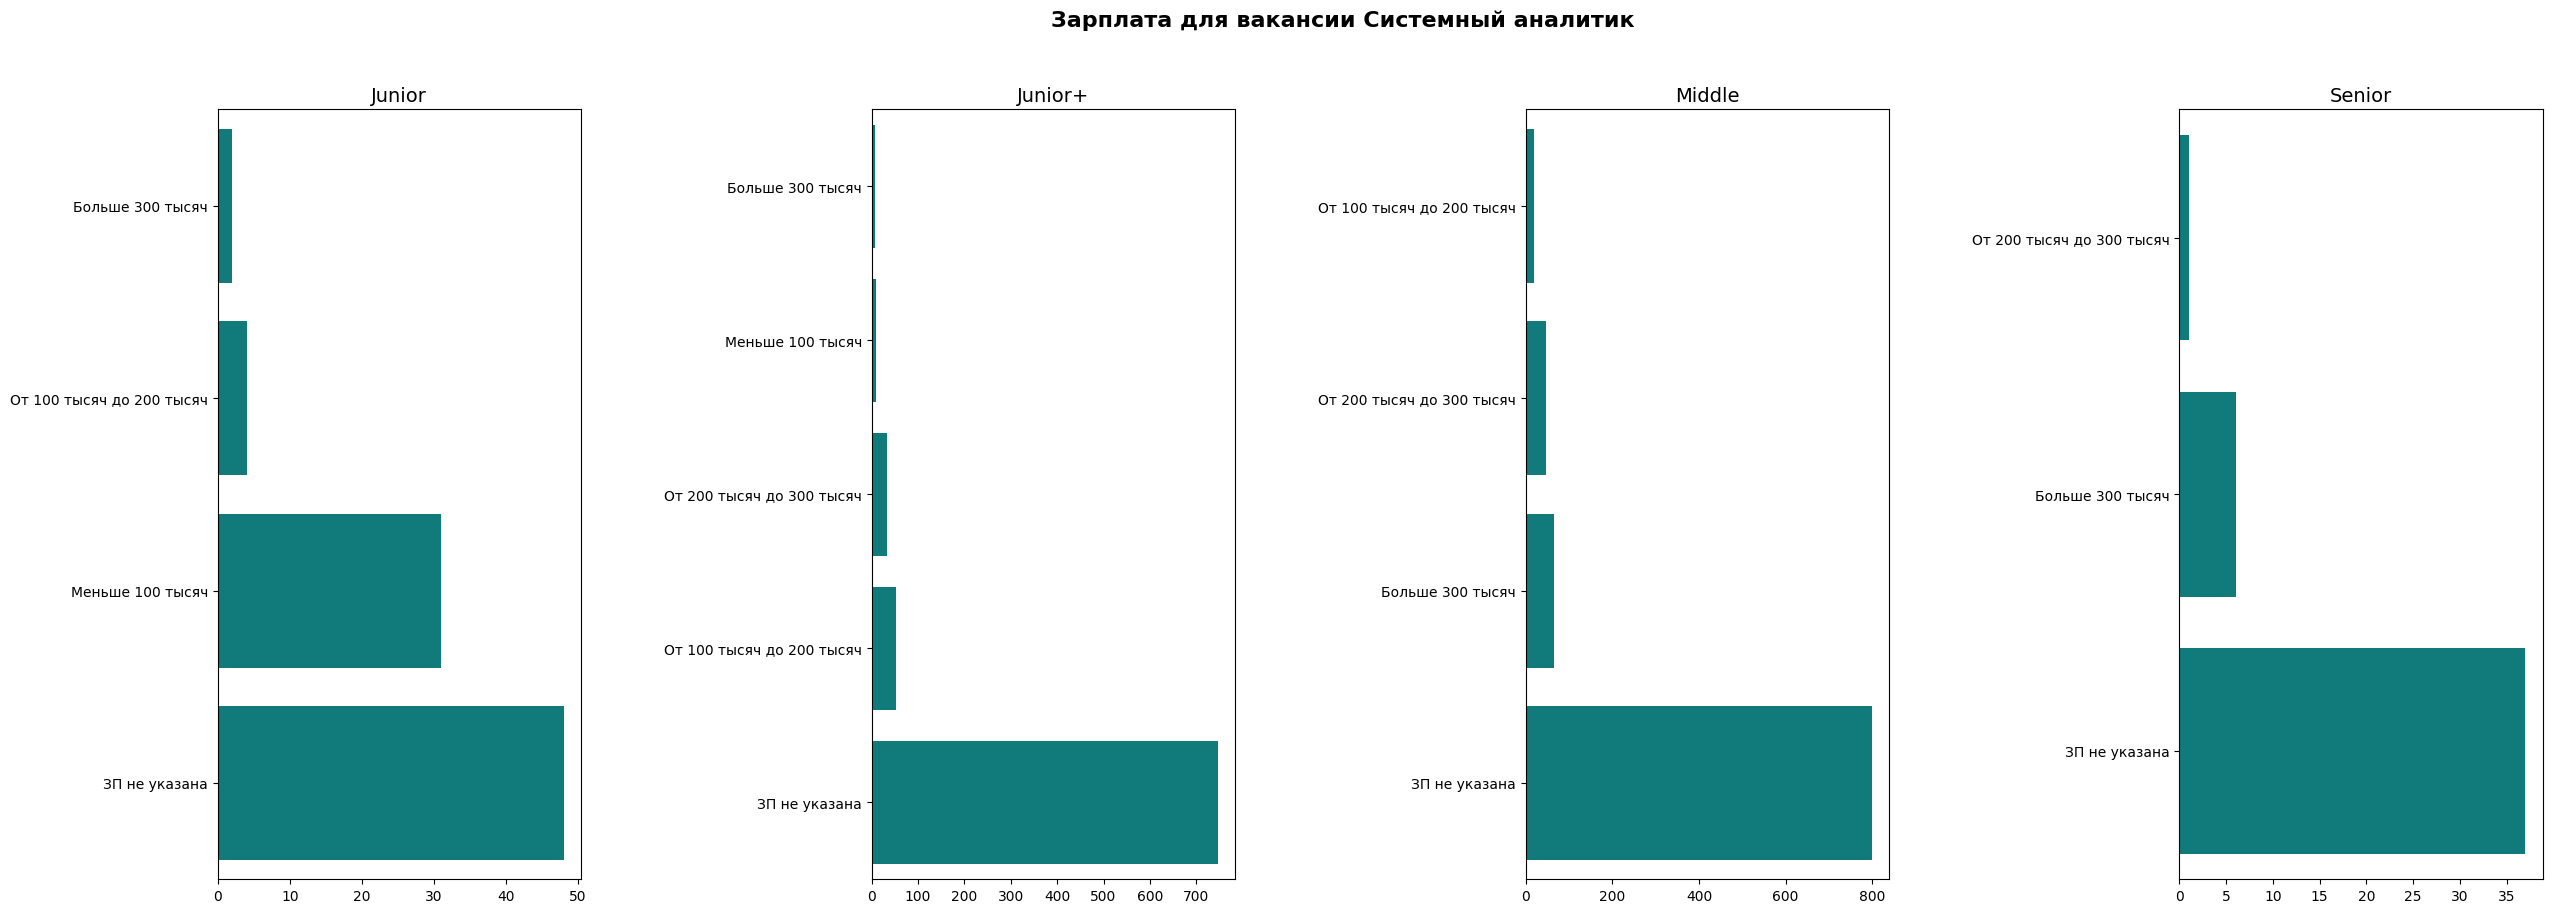

In [ ]:
# Построим диаграммы для вакансии Системный аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Зарплата для вакансии Системный аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      sa_salary = (vacancies.loc[(vacancies['v_type'] == 'sa') & (vacancies['grade'] == f'{grade[i]}')
          , 'salary_bin'].value_counts().sort_values()).reset_index()


# Строим график
      sns.barplot(x='count', y='salary_bin', data=sa_salary, ax=ax[i], color='#008B8B')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

**Вывод по подразделу:**

1. Для вакансий "Дата-аналитик" и "Системный аналитик" уровня Junior в большинстве случаев зарплата не указана или указана менье 100 000.
2. Для вакансий "Дата-аналитик" и "Системный аналитик" уровня Junior+ и Middle в большинстве случаев зарплата не указана.
3. Для вакансии "Дата-аналитик"  уровня Senior в большинстве случаев зарплата не указана или указана от 200 000 до 300 000.
4. Для вакансии "Системный аналитик"  уровня Senior в большинстве случаев зарплата не указана или указана от 300 000.
5. Следовательно, можно сделать вывод, что работодатели предпочитают обсуждать желаемый уровень дохода на собеседованиях и оринетируясь на представления соискателя.

#### Шаг 3.3.3 Определение типичного места работы для Аналитика данных и Системного аналитика по типу занятости.

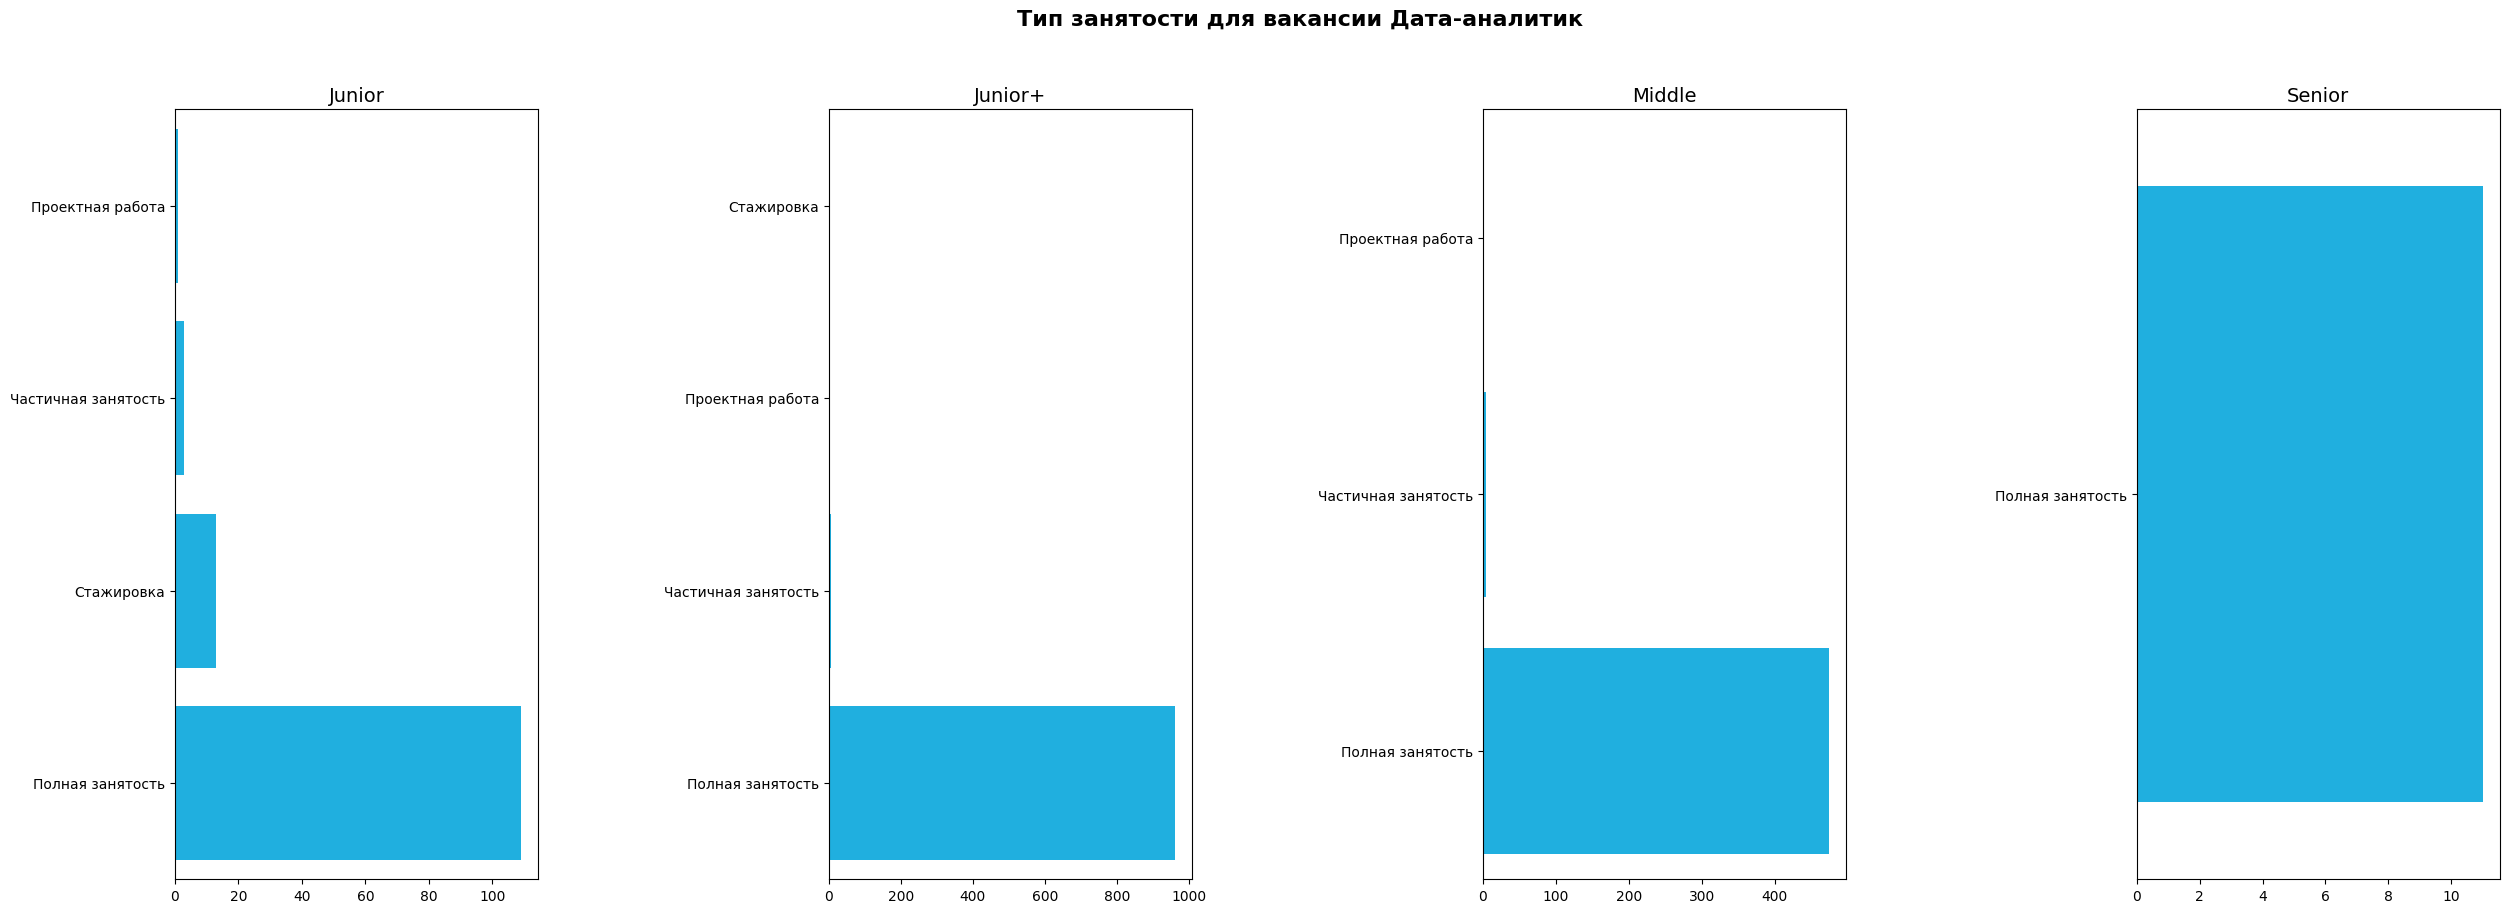

In [ ]:
# Построим диаграммы для вакансии Дата-аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Тип занятости для вакансии Дата-аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      da_emlp = (vacancies.loc[(vacancies['v_type'] == 'da') & (vacancies['grade'] == f'{grade[i]}')
          , 'employment'].value_counts().sort_values()).reset_index()

# Строим график
      sns.barplot(x='count', y='employment', data=da_emlp, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

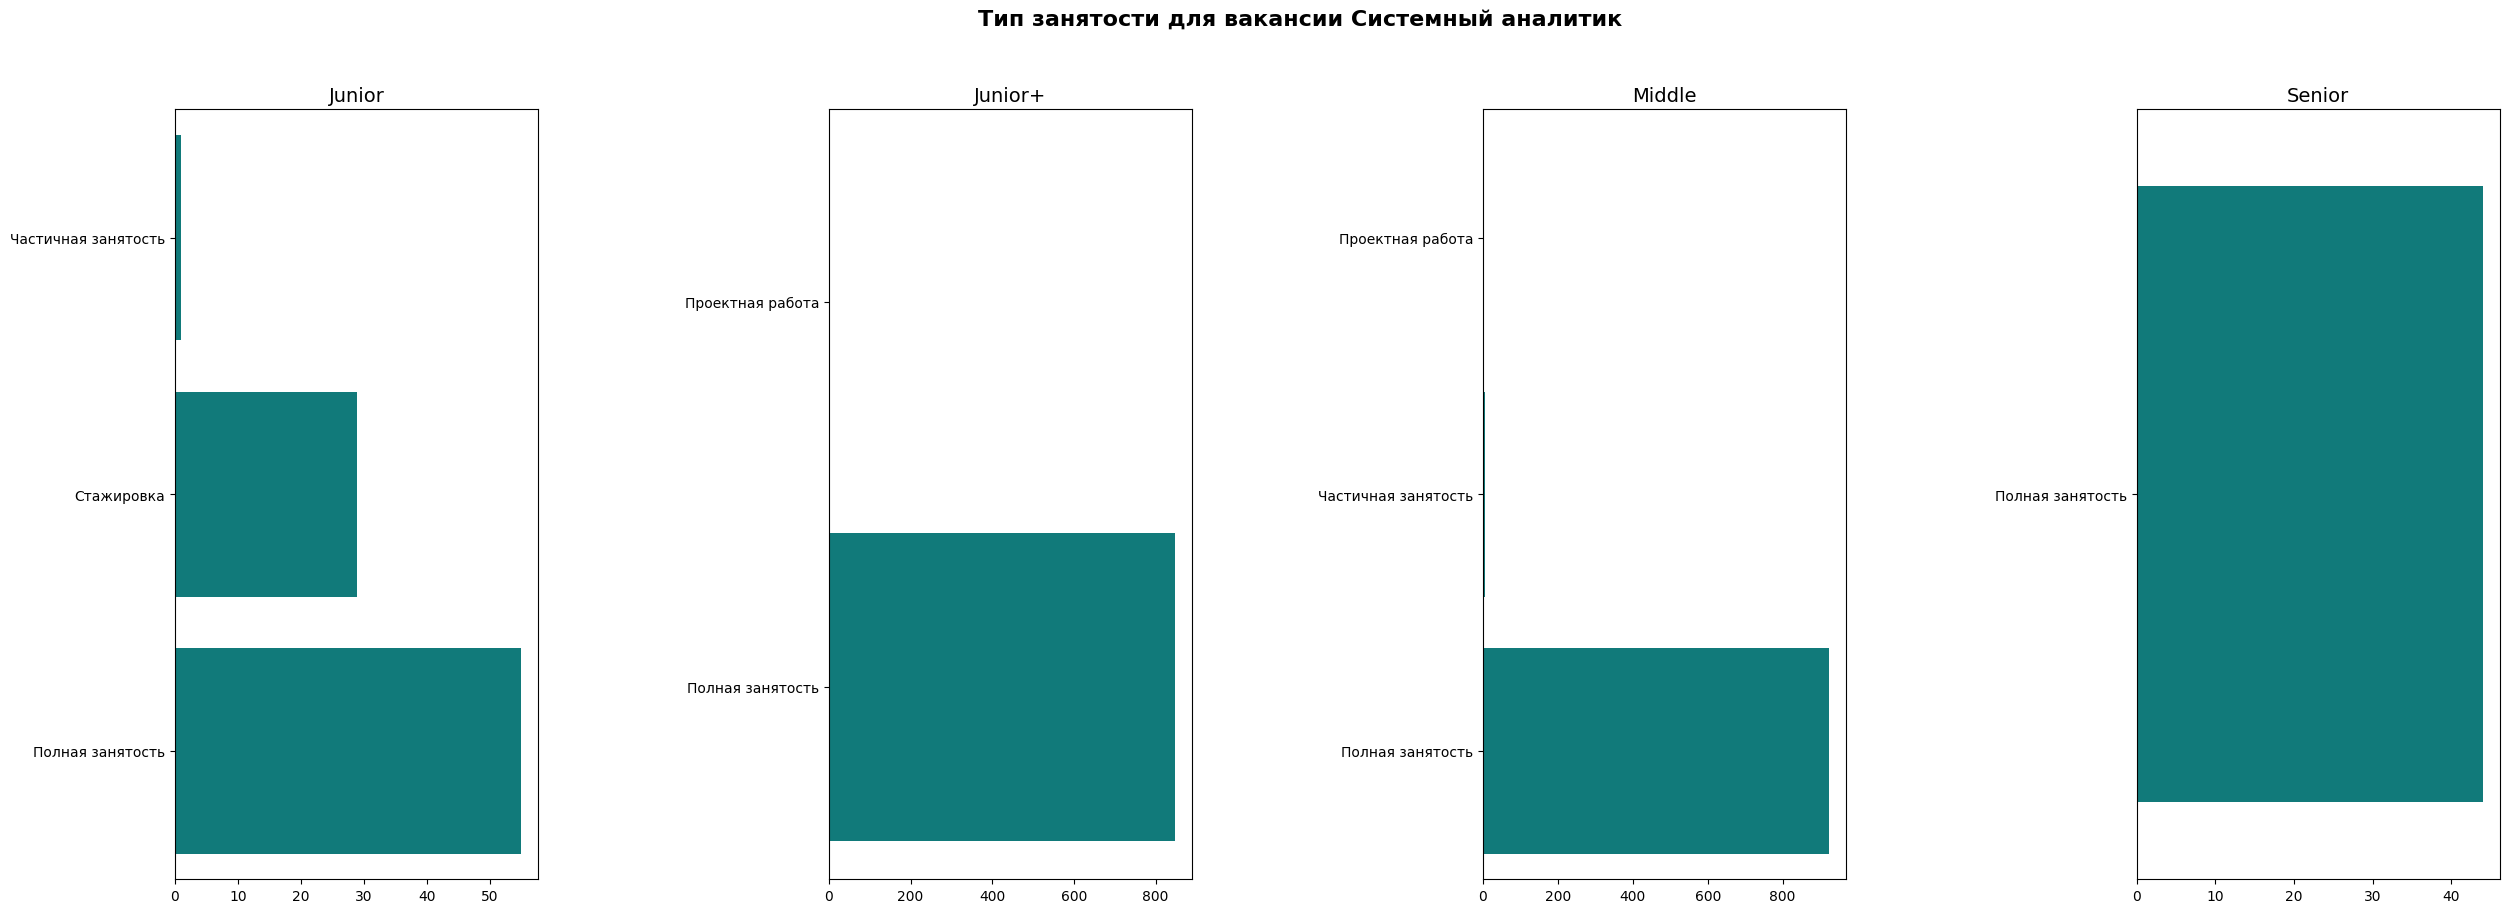

In [ ]:
# Построим диаграммы для вакансии Системный аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Тип занятости для вакансии Системный аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      sa_emlp = (vacancies.loc[(vacancies['v_type'] == 'sa') & (vacancies['grade'] == f'{grade[i]}')
          , 'employment'].value_counts().sort_values()).reset_index()


# Строим график
      sns.barplot(x='count', y='employment', data=sa_emlp, ax=ax[i], color='#008B8B')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

**Вывод по подразделу:**

1. Для вакансий "Дата-аналитик" и "Системный аналитик" уровня Junior в большинстве случаев требуются соискатели на полную занятость и на стажировку.
2. Для вакансий "Дата-аналитик" и "Системный аналитик" уровня Junior+ и Middle в подавляющем большинстве случаев требуются соискатели на полную занятость.
3. Для вакансий "Дата-аналитик" и "Системный аналитик" уровня Senior в требуются соискатели только на полную занятость.

#### Шаг 3.3.4 Определение типичного места работы для Аналитика данных и Системного аналитика по графику занятости.

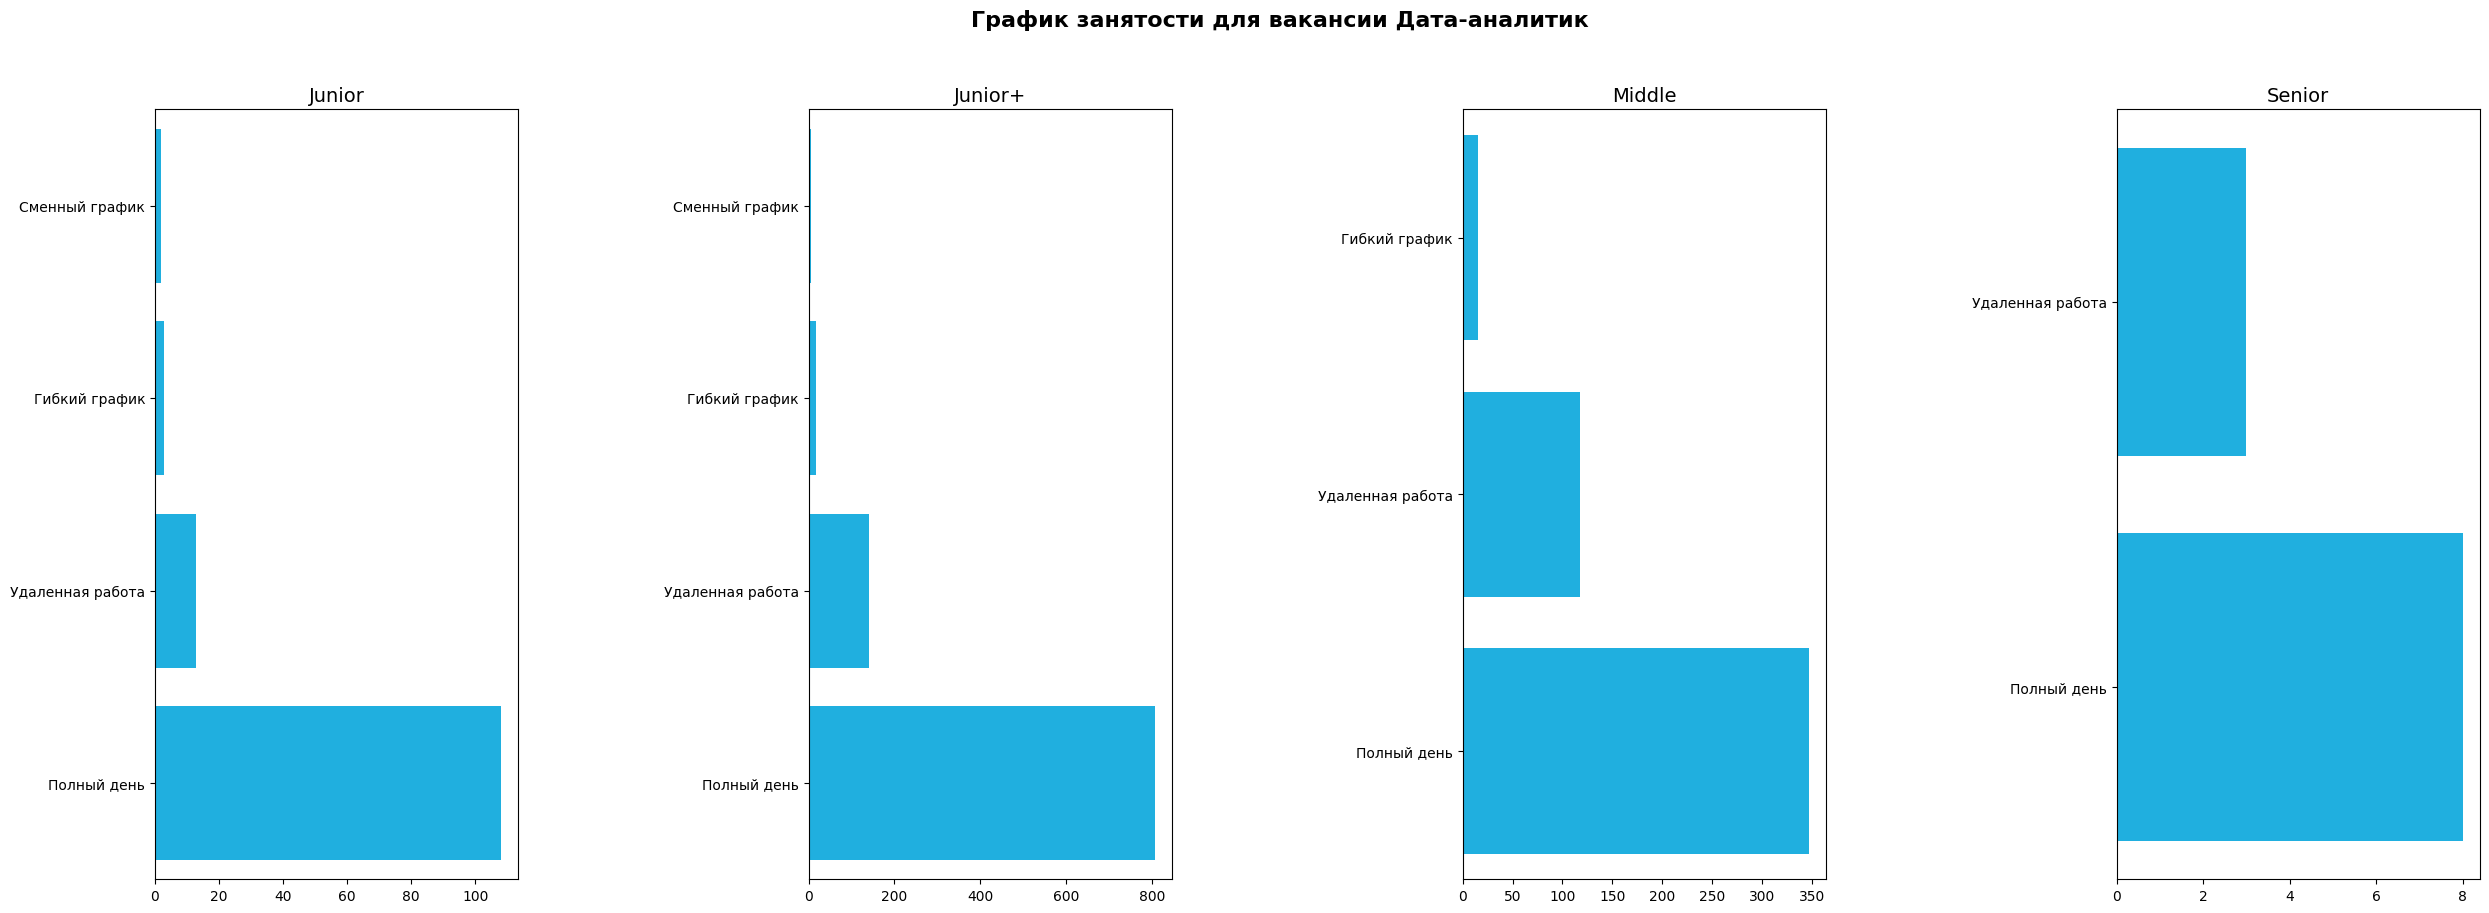

In [ ]:
# Построим диаграммы для вакансии Дата-аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('График занятости для вакансии Дата-аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      da_sched = (vacancies.loc[(vacancies['v_type'] == 'da') & (vacancies['grade'] == f'{grade[i]}')
          , 'schedule'].value_counts().sort_values()).reset_index()

# Строим график
      sns.barplot(x='count', y='schedule', data=da_sched, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

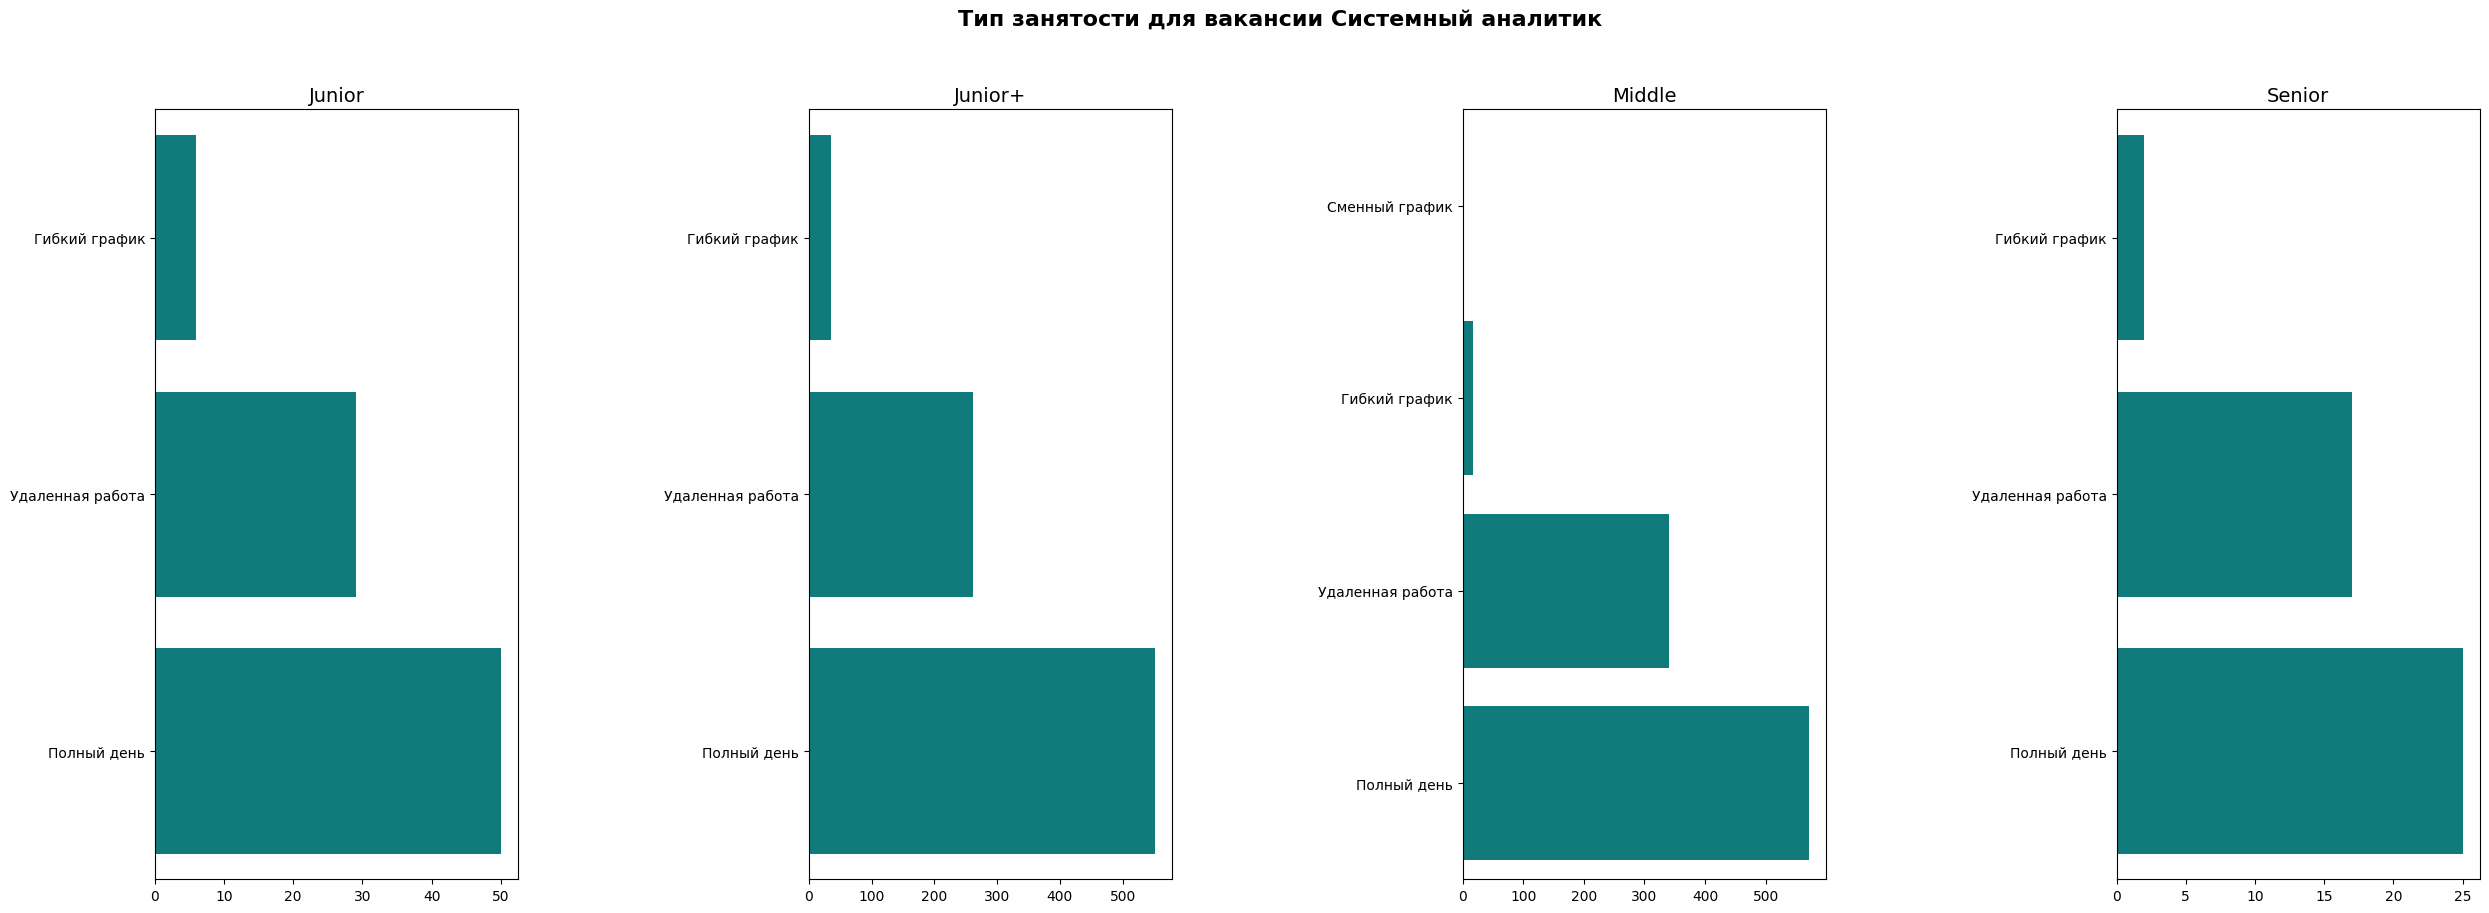

In [ ]:
# Построим диаграммы для вакансии Системный аналитик
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Тип занятости для вакансии Системный аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      sa_sched = (vacancies.loc[(vacancies['v_type'] == 'sa') & (vacancies['grade'] == f'{grade[i]}')
          , 'schedule'].value_counts().sort_values()).reset_index()


# Строим график
      sns.barplot(x='count', y='schedule', data=sa_sched, ax=ax[i], color='#008B8B')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

**Вывод по подразделу:**

1. Для вакансий "Дата-аналитик" и "Системный аналитик" всех уровней в большинстве случаев требуются соискатели на полный день и удаленную работу.

**Вывод по разделу:**

1. Основными работодателями являются компании: СБЕР, T1, Aston.
2. Типичные требования к соискателям на вакансии "Дата-аналитик" и "Системный аналитик" всех уровней:
- Заработная плата не указана.
- Полная занятость.
- Полный рабочий день или удаленная работа.



### Шаг 3.4 Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

In [ ]:
# Преобразуем исходный датафрейм с разбиением столбца "Ключевые навыки" на отдельные слова
from ast import literal_eval

vacancies['key_skills']=vacancies['key_skills'].apply(literal_eval)
vacancies_ex = vacancies.explode('key_skills').reset_index(drop=True)



In [ ]:
# Проверяем внесенные изменения
display(vacancies_ex)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,v_type,grade_name,grade
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),Power BI,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da,NaN,Junior
1,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),СУБД,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da,NaN,Junior
2,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),Python,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da,NaN,Junior
3,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),SQL,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da,NaN,Junior
4,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),MS SQL,...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,da,Middle,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19564,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),Документация,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior
19565,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),1С: Предприятие,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior
19566,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),1С: Бит Финанс,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior
19567,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),MS Project,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior


In [ ]:
# Исследуем уникальные значения столбца "key_skills"
vacancies_ex['key_skills'].value_counts().head(30)



,count
key_skills,
Документация,1534
SQL,1347
BPMN,653
confluence,652
Аналитическое мышление,619
Системный анализ,571
UML,571
Python,556
Анализ данных,445


In [ ]:
# Заполним значения в столбце "hard_skills_from_description" значениями из столбца "key_skills"
vacancies_ex.loc[(
    (vacancies_ex['key_skills'] == 'SQL') |
    (vacancies_ex['key_skills'] == 'BPMN') |
    (vacancies_ex['key_skills'] == 'confluence') |
    (vacancies_ex['key_skills'] == 'UML') |
    (vacancies_ex['key_skills'] == 'Python') |
    (vacancies_ex['key_skills'] == 'Анализ данных') |
    (vacancies_ex['key_skills'] == 'REST') |
    (vacancies_ex['key_skills'] == 'Pandas') |
    (vacancies_ex['key_skills'] == 'SOAP') |
    (vacancies_ex['key_skills'] == 'Разработка технических заданий') |
    (vacancies_ex['key_skills'] == 'Работа с базами данных') |
    (vacancies_ex['key_skills'] == 'Бизнес-анализ') |
    (vacancies_ex['key_skills'] == 'Постановка задач разработчикам') |
    (vacancies_ex['key_skills'] == 'Работа с большим объемом информации') |
    (vacancies_ex['key_skills'] == 'XML') |
    (vacancies_ex['key_skills'] == 'Power BI') |
    (vacancies_ex['key_skills'] == 'Базы данных') |
    (vacancies_ex['key_skills'] == 'MS Excel') |
    (vacancies_ex['key_skills'] == 'MS SQL') |
    (vacancies_ex['key_skills'] == 'API') |
    (vacancies_ex['key_skills'] == 'PostgreSQL') |
    (vacancies_ex['key_skills'] == 'Atlassian Jira') |
    (vacancies_ex['key_skills'] == 'JSON') |
    (vacancies_ex['key_skills'] == 'Atlassian Confluence') |
    (vacancies_ex['key_skills'] == 'Data Analysis')
                  ), 'hard_skills_from_description'] = vacancies_ex['key_skills'].reset_index(drop=True)



In [ ]:
# Проверяем внесенные изменения
vacancies_ex_1 = vacancies_ex.loc[vacancies_ex['soft_skills_from_description'] == 'SQL']
display(vacancies_ex_1)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,v_type,grade_name,grade


In [ ]:
# Заполним значения в столбце "soft_skills_from_description" значениями из столбца "key_skills"
vacancies_ex.loc[(
    (vacancies_ex['key_skills'] == 'Документация') |
    (vacancies_ex['key_skills'] == 'Аналитическое мышление') |
    (vacancies_ex['key_skills'] == 'Системный анализ') |
    (vacancies_ex['key_skills'] == 'Коммуникация') |
    (vacancies_ex['key_skills'] == 'Аналитика')
                  ), 'soft_skills_from_description'] = vacancies_ex['key_skills'].reset_index(drop=True)

In [ ]:
# Проверяем внесенные изменения
display(vacancies_ex)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,v_type,grade_name,grade
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),Power BI,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",Power BI,NaN,da,NaN,Junior
1,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),СУБД,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da,NaN,Junior
2,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),Python,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",Python,NaN,da,NaN,Junior
3,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),SQL,...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",SQL,NaN,da,NaN,Junior
4,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),MS SQL,...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",MS SQL,NaN,da,Middle,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19564,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),Документация,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior
19565,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),1С: Предприятие,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior
19566,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),1С: Бит Финанс,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior
19567,99991121,старший системный аналитик 1c (sminex finance),2024-07-08 11:18:03,https://hh.ru/vacancy/99991121,Открытая,Sminex,Sminex Информационные технологии,Москва,Senior (6+ years),MS Project,...,привет команда sminex it искать талантливый си...,280000.0,340000.0,Больше 300 тысяч,"1С: Бит Финанс, 1С: Предприятие, MS Excel, MS ...",NaN,Документация,sa,NaN,Senior


In [ ]:
# Посчитаем кол-во уникальных значений жестких навыков
vacancies_ex['hard_skills_from_description'].nunique()

32

In [ ]:
# Посчитаем кол-во уникальных значений мягких навыков
vacancies_ex['soft_skills_from_description'].nunique()

48

In [ ]:
# Определеяем кол-во пропуском в датафрейме
vacancies_ex.isna().sum().sort_values(ascending = False)

,0
department,16603
salary_to,15554
salary_from,14561
grade_name,11914
hard_skills_from_description,8471
soft_skills_from_description,6866
key_skills_from_key_skills_field,1644
key_skills,457
id,0
description_lemmatized,0


In [ ]:
# Определим кол-во уникальных жестких навыков для Дата-аналитика
vacancies_hard_da = vacancies_ex.query('v_type == "da"').groupby('grade').agg({'hard_skills_from_description': 'nunique'})
display(vacancies_hard_da)

,hard_skills_from_description
grade,
Junior,19
Junior+,26
Middle,27
Senior,10


In [ ]:
# Определим кол-во уникальных жестких навыков для Системного аналитика
vacancies_hard_sa = vacancies_ex.query('v_type == "sa"').groupby('grade').agg({'hard_skills_from_description': 'nunique'})
display(vacancies_hard_sa)

,hard_skills_from_description
grade,
Junior,26
Junior+,31
Middle,29
Senior,27


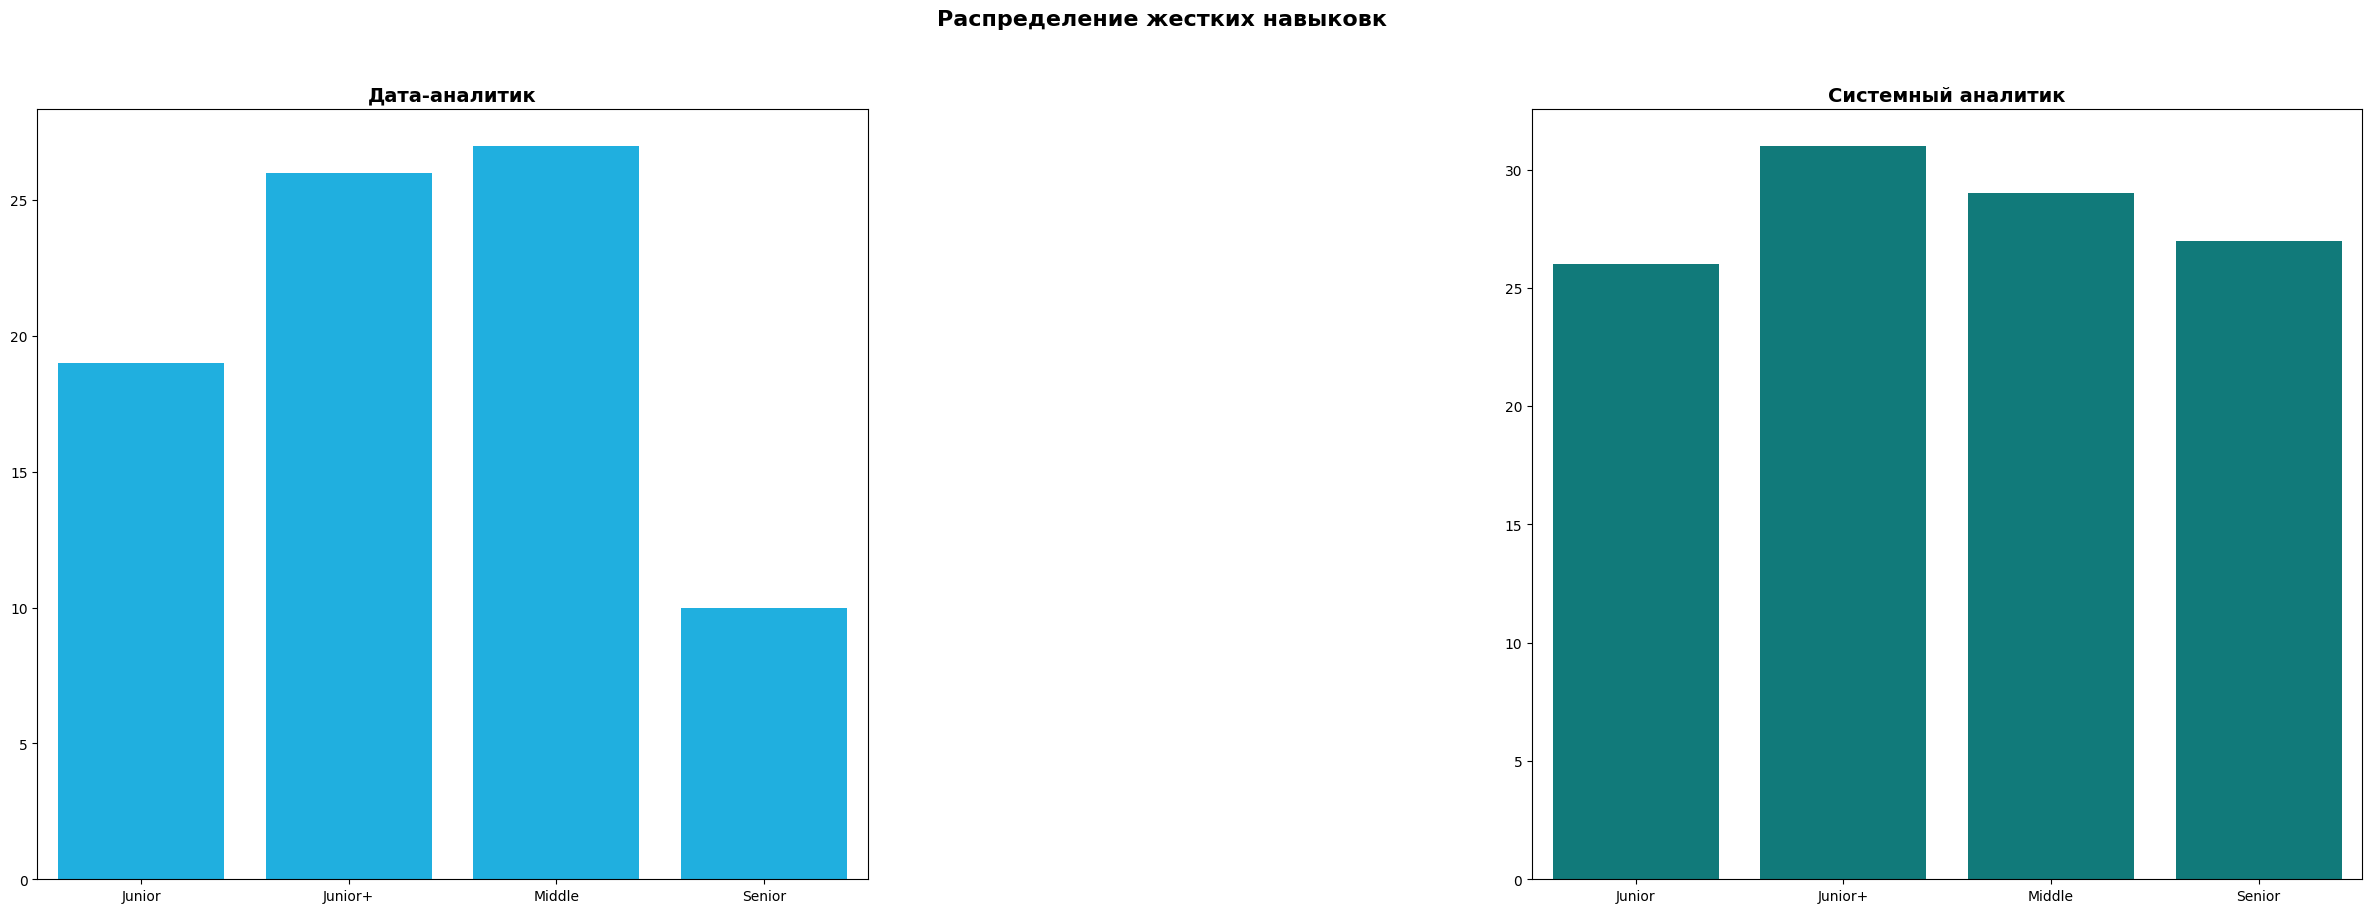

In [ ]:
# Построим диаграммы для вакансий Дата-аналитик и Системный по жестким навыкам
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.suptitle('Распределение жестких навыковк', fontsize=16, fontweight='bold')

# Строим график
boxplot = sns.barplot(x='grade', y='hard_skills_from_description', data=vacancies_hard_da, ax=ax[0], color='#00BFFF')
ax[0].set_title(f"Дата-аналитик", fontsize=14, fontweight='bold')
boxplot.set_xlabel("", fontsize=1)
boxplot.set_ylabel("", fontsize=1)


boxplot = sns.barplot(x='grade', y='hard_skills_from_description', data=vacancies_hard_sa, ax=ax[1], color='#008B8B')
ax[1].set_title(f"Системный аналитик", fontsize=14, fontweight='bold')
boxplot.set_xlabel("", fontsize=1)
boxplot.set_ylabel("", fontsize=1);


plt.subplots_adjust(wspace = 0.8)
plt.show()

In [ ]:
# Определим кол-во уникальных мягких навыков для Дата-аналитика
vacancies_soft_da = vacancies_ex.query('v_type == "da"').groupby('grade').agg({'soft_skills_from_description': 'nunique'})
display(vacancies_soft_da)

,soft_skills_from_description
grade,
Junior,12
Junior+,25
Middle,24
Senior,8


In [ ]:
# Определим кол-во уникальных мягких навыков для Системного аналитика
vacancies_soft_sa = vacancies_ex.query('v_type == "sa"').groupby('grade').agg({'soft_skills_from_description': 'nunique'})
display(vacancies_soft_sa)

,soft_skills_from_description
grade,
Junior,9
Junior+,25
Middle,21
Senior,9


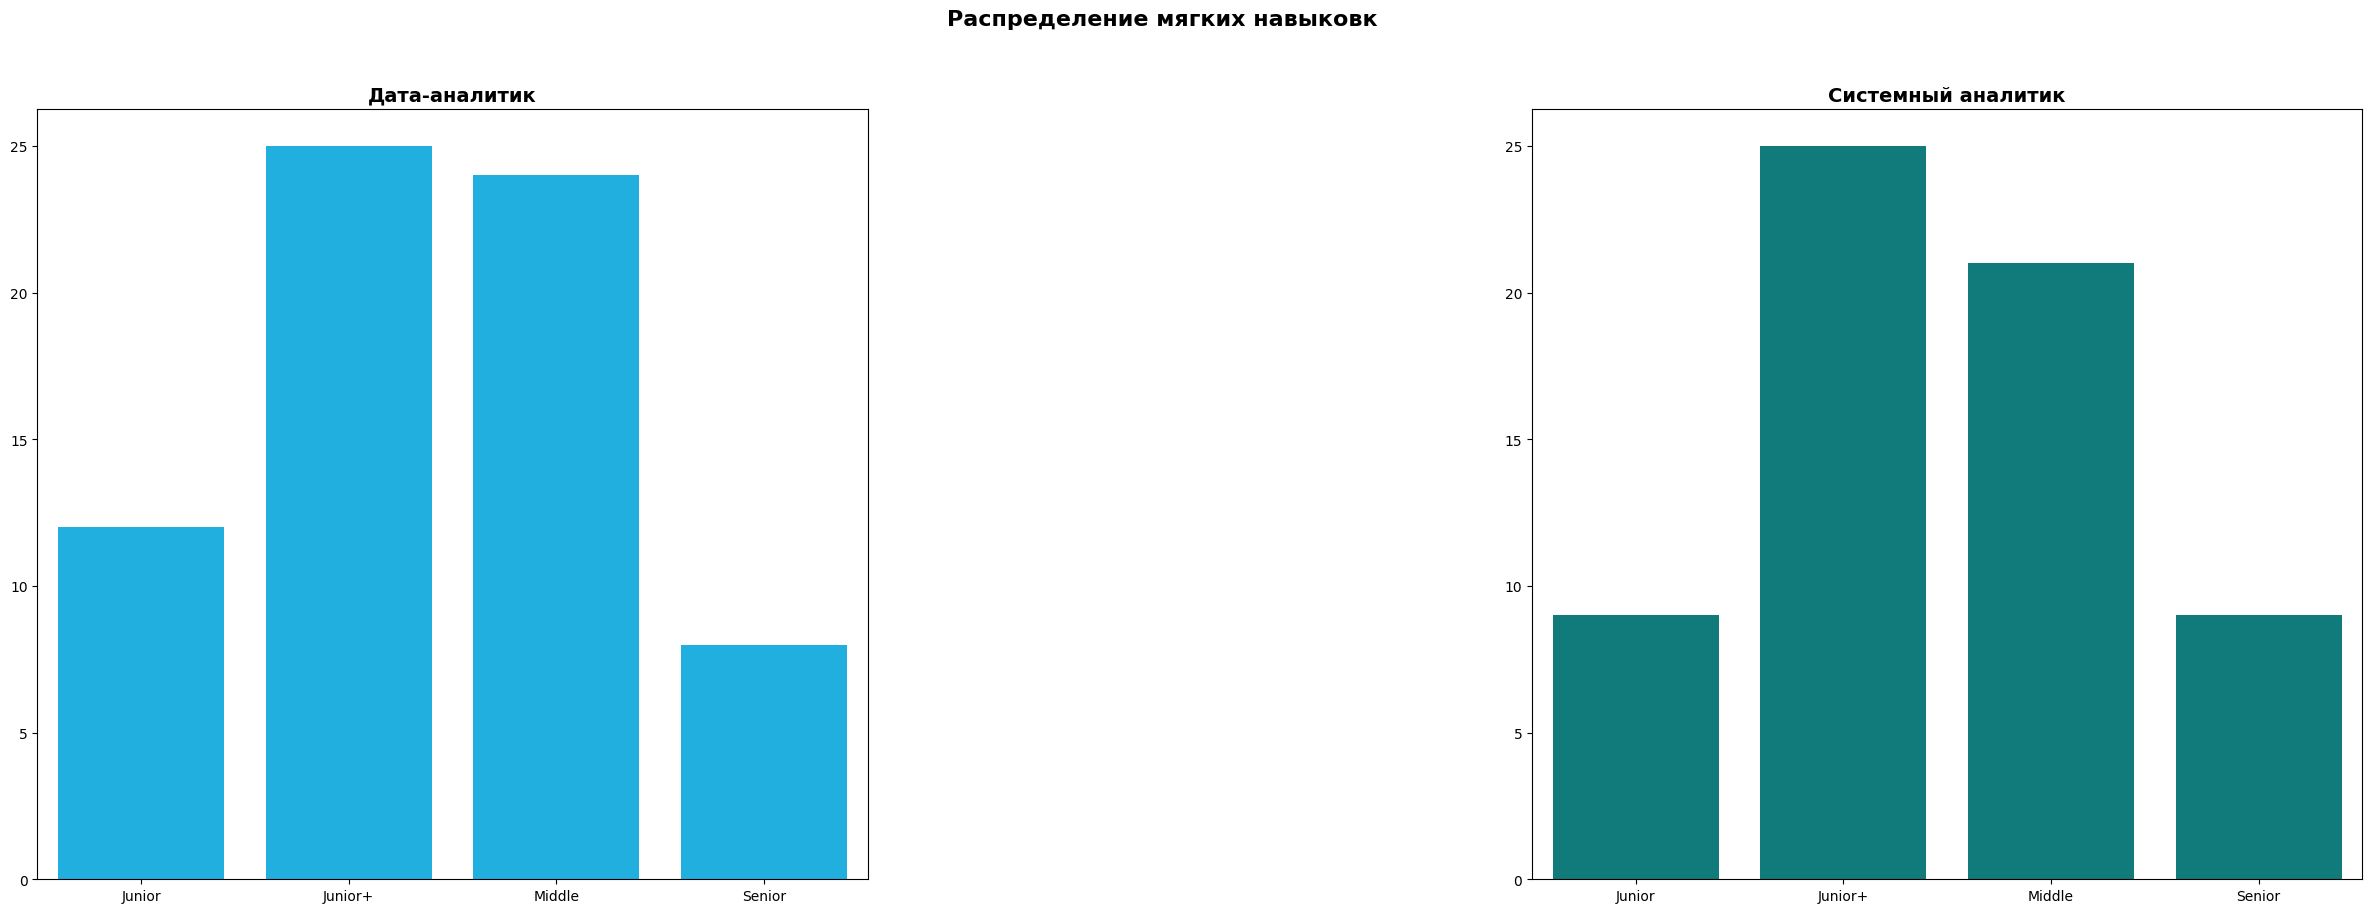

In [ ]:
# Построим диаграммы для вакансий Дата-аналитик и Системный по мягким навыкам
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.suptitle('Распределение мягких навыковк', fontsize=16, fontweight='bold')

# Строим график
boxplot = sns.barplot(x='grade', y='soft_skills_from_description', data=vacancies_soft_da, ax=ax[0], color='#00BFFF')
ax[0].set_title(f"Дата-аналитик", fontsize=14, fontweight='bold')
boxplot.set_xlabel("", fontsize=1)
boxplot.set_ylabel("", fontsize=1)


boxplot = sns.barplot(x='grade', y='soft_skills_from_description', data=vacancies_soft_sa, ax=ax[1], color='#008B8B')
ax[1].set_title(f"Системный аналитик", fontsize=14, fontweight='bold')
boxplot.set_xlabel("", fontsize=1)
boxplot.set_ylabel("", fontsize=1);


plt.subplots_adjust(wspace = 0.8)
plt.show()

**Вывод по разделу:**

1. Исходя из заполняемости полей "Жесткие навыки" (hard_skills_from_description)- не заполнено 8471, и "Мягкие навыки" (soft_skills_from_description) - не заполнено 6866, можно сделать вывод, что мягкие навыки спрашивают чаще.
2. Для вакансий Дата-аналитик и Системный аналитик больше всего требований к уровню Junior+ и Middle.

### Шаг 3.5 Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Анализ необходимо провести отдельно для грейдов Junior, Junior+, Middle, Senior.

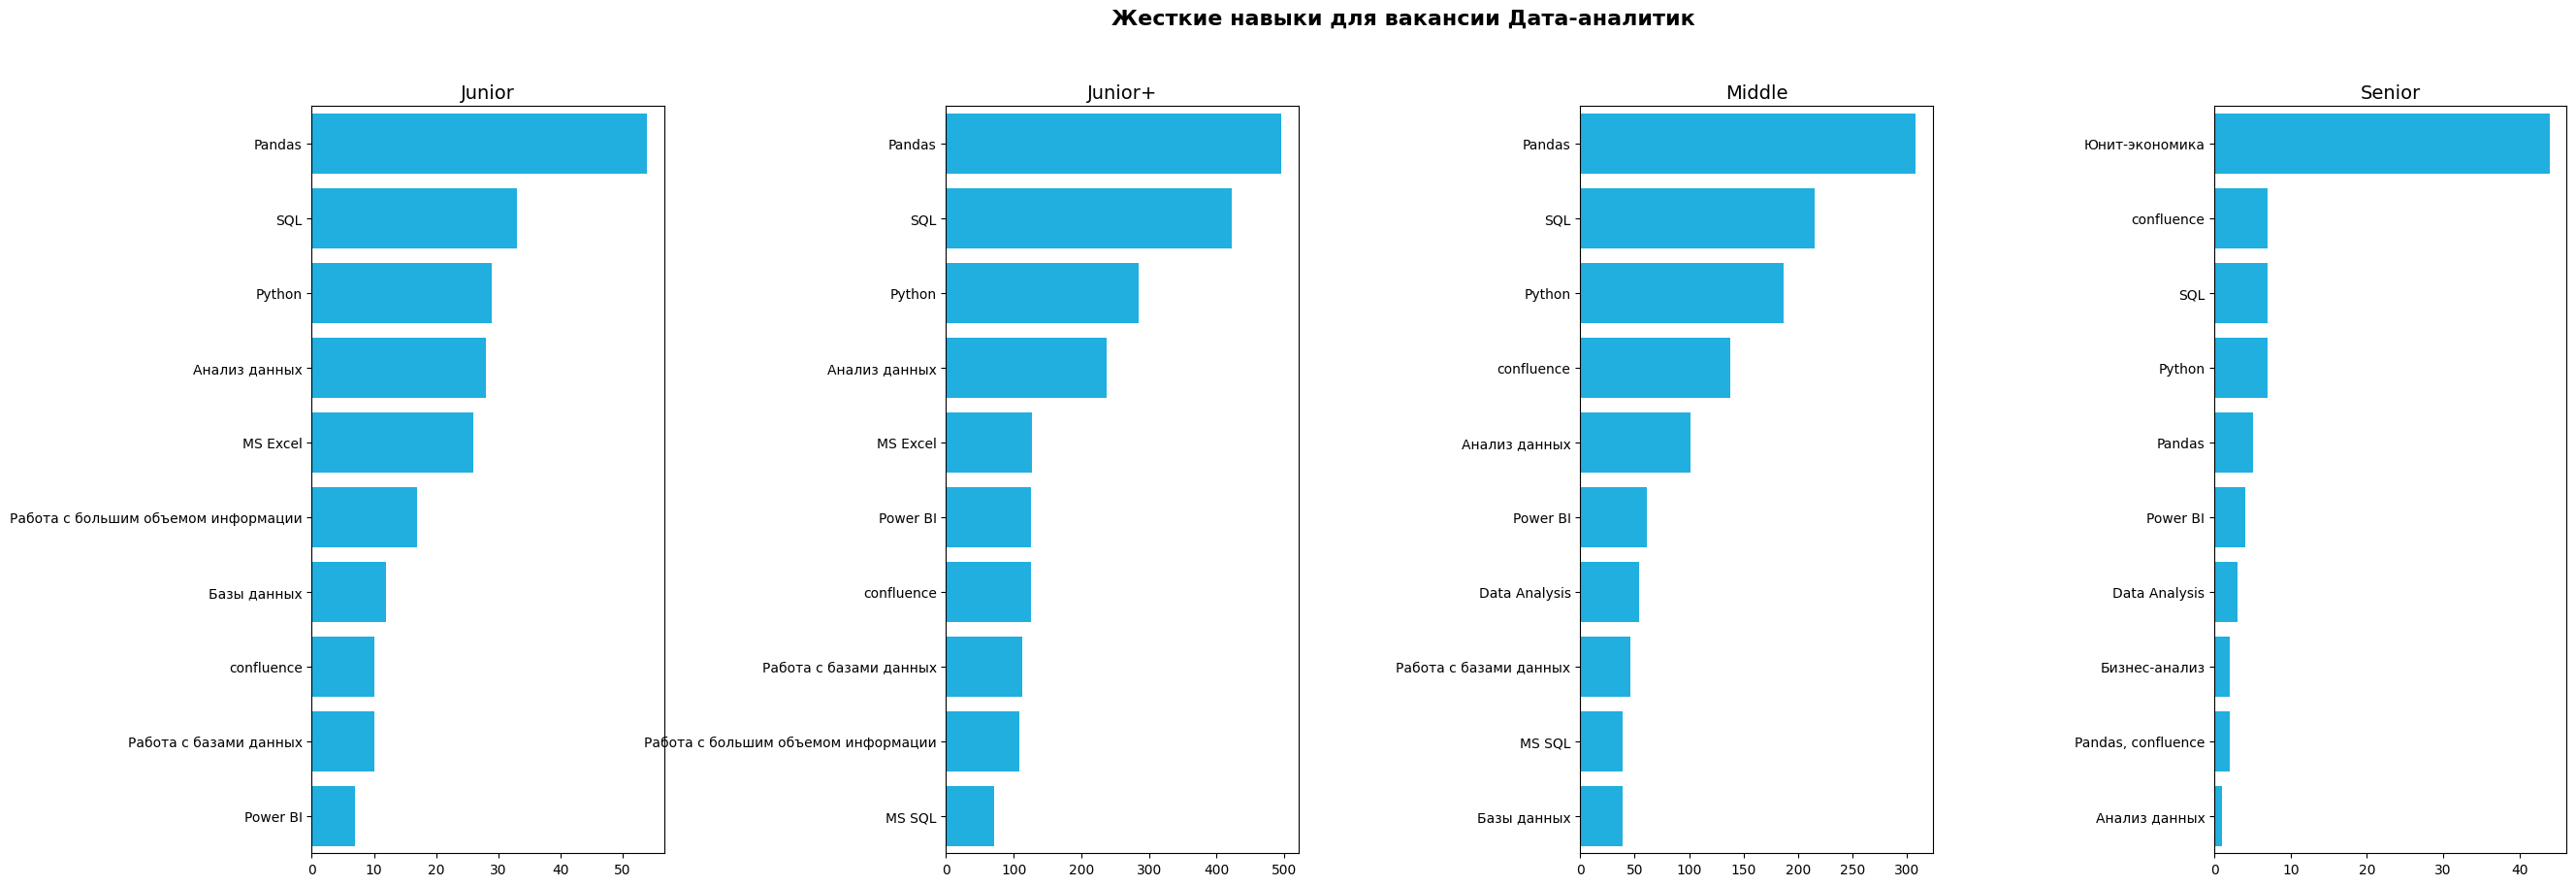

In [ ]:
# Построим диаграммы для вакансии Дата-аналитик по жестким навыкам
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Жесткие навыки для вакансии Дата-аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      da_hard_skills = (
          vacancies_ex.loc[(vacancies_ex['v_type'] == 'da') &
                                         (vacancies_ex['grade'] == f'{grade[i]}')
          , 'hard_skills_from_description'].value_counts().head(10)).reset_index()

# Строим график
      sns.barplot(x='count', y='hard_skills_from_description', data=da_hard_skills, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

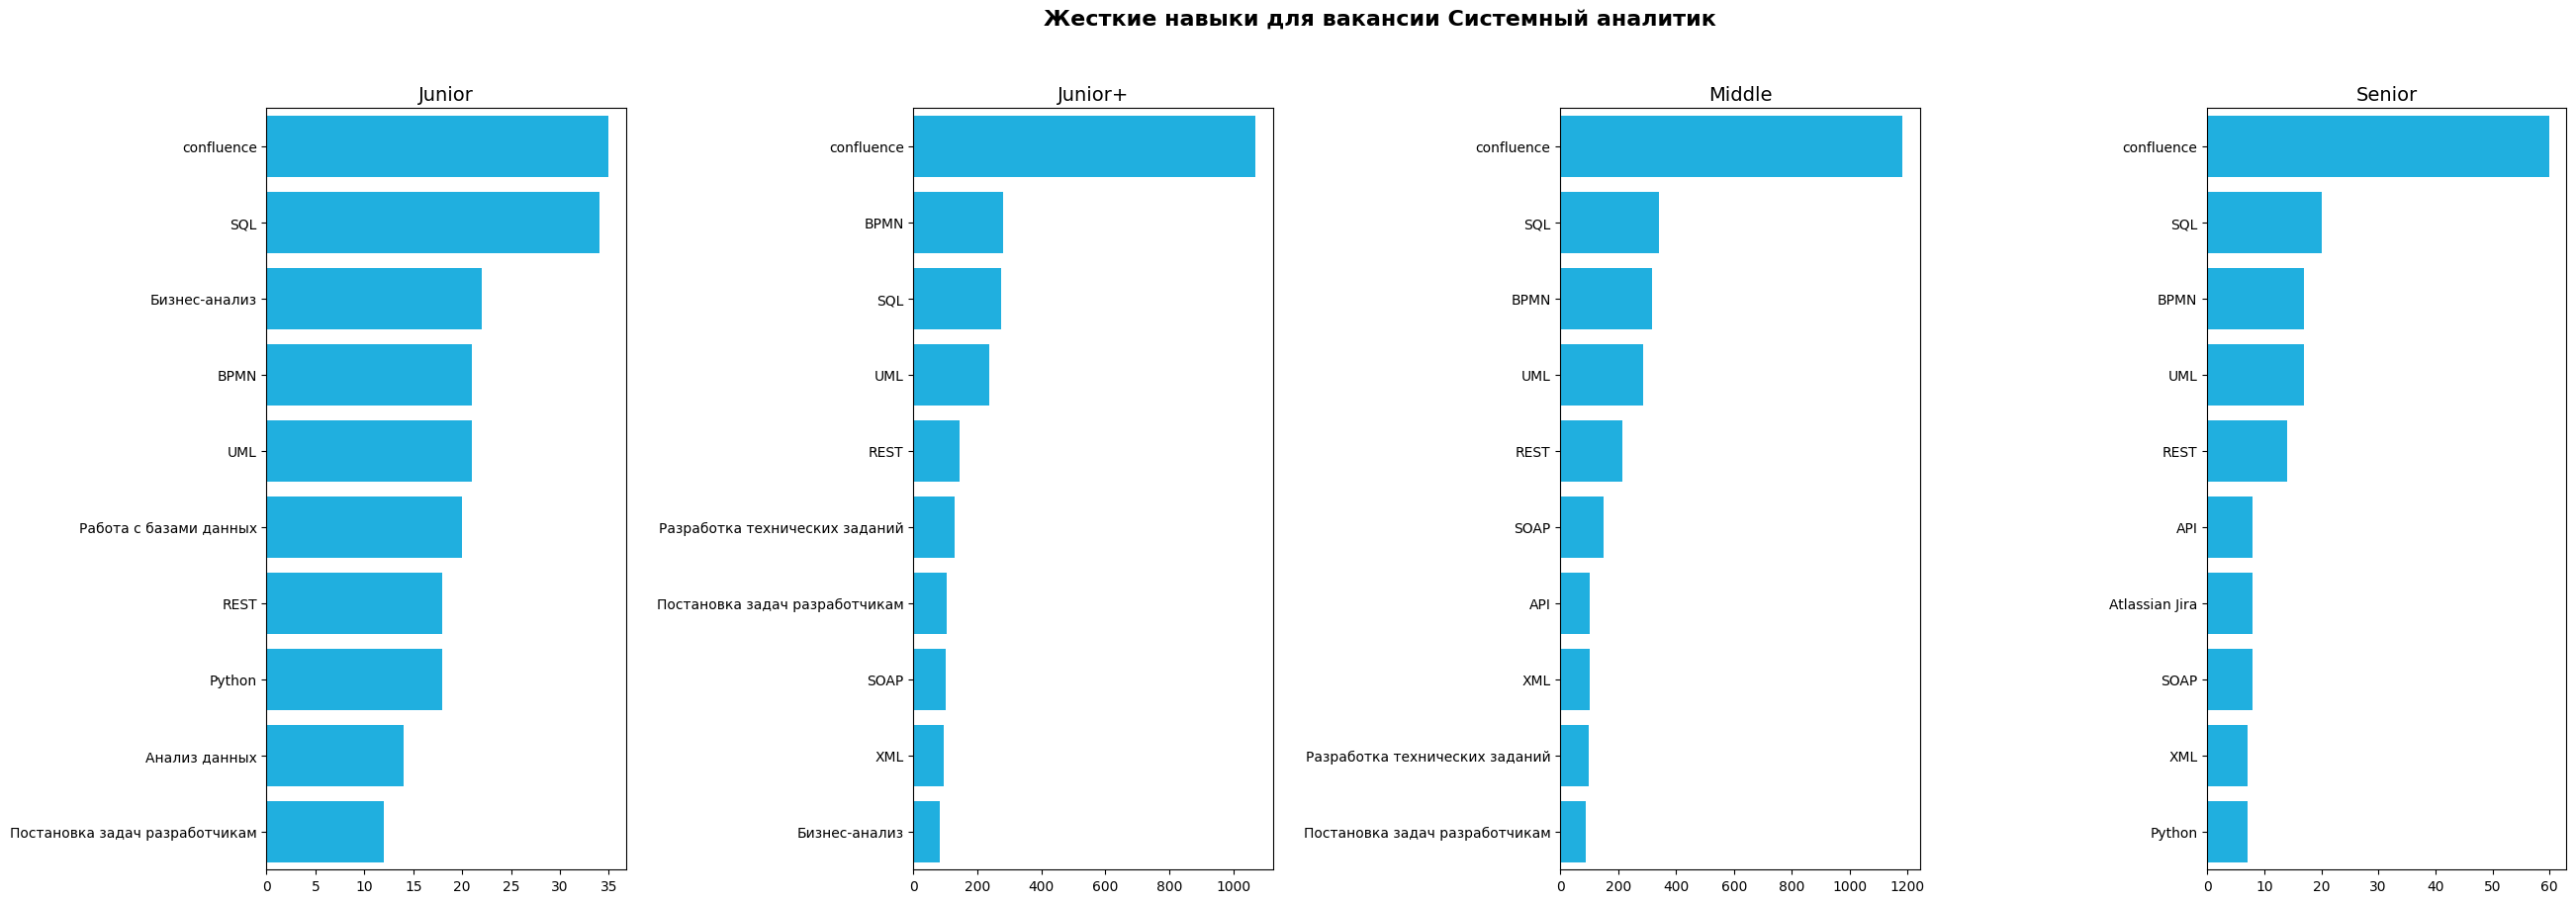

In [ ]:
# Построим диаграммы для вакансии Системный аналитик по жестким навыкам
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Жесткие навыки для вакансии Системный аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      sa_hard_skills = (
          vacancies_ex.loc[(vacancies_ex['v_type'] == 'sa') &
                                         (vacancies_ex['grade'] == f'{grade[i]}')
          , 'hard_skills_from_description'].value_counts().head(10)).reset_index()

# Строим график
      sns.barplot(x='count', y='hard_skills_from_description', data=sa_hard_skills, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

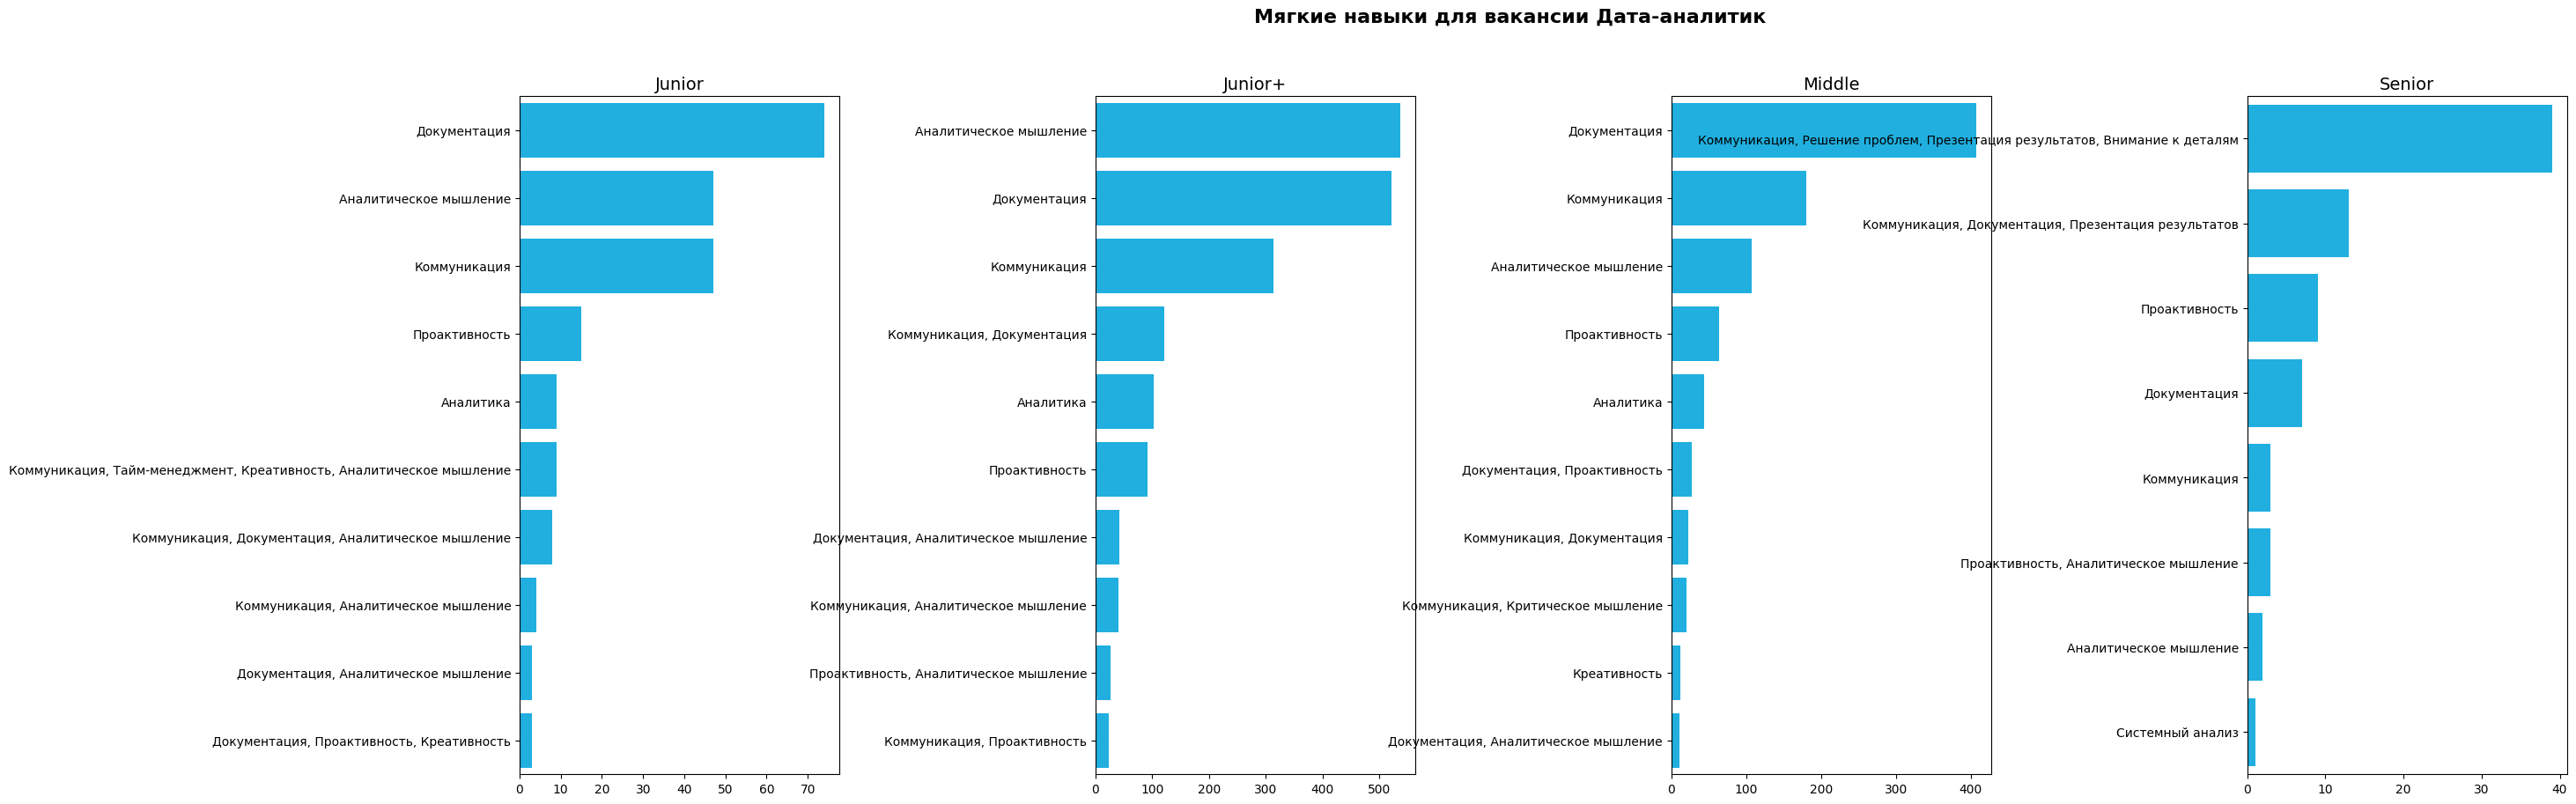

In [ ]:
# Построим диаграммы для вакансии Дата-аналитик по мягким навыкам
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Мягкие навыки для вакансии Дата-аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      da_soft_skills = (
          vacancies_ex.loc[(vacancies_ex['v_type'] == 'da') &
                                         (vacancies_ex['grade'] == f'{grade[i]}')
          , 'soft_skills_from_description'].value_counts().head(10)).reset_index()

# Строим график
      sns.barplot(x='count', y='soft_skills_from_description', data=da_soft_skills, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

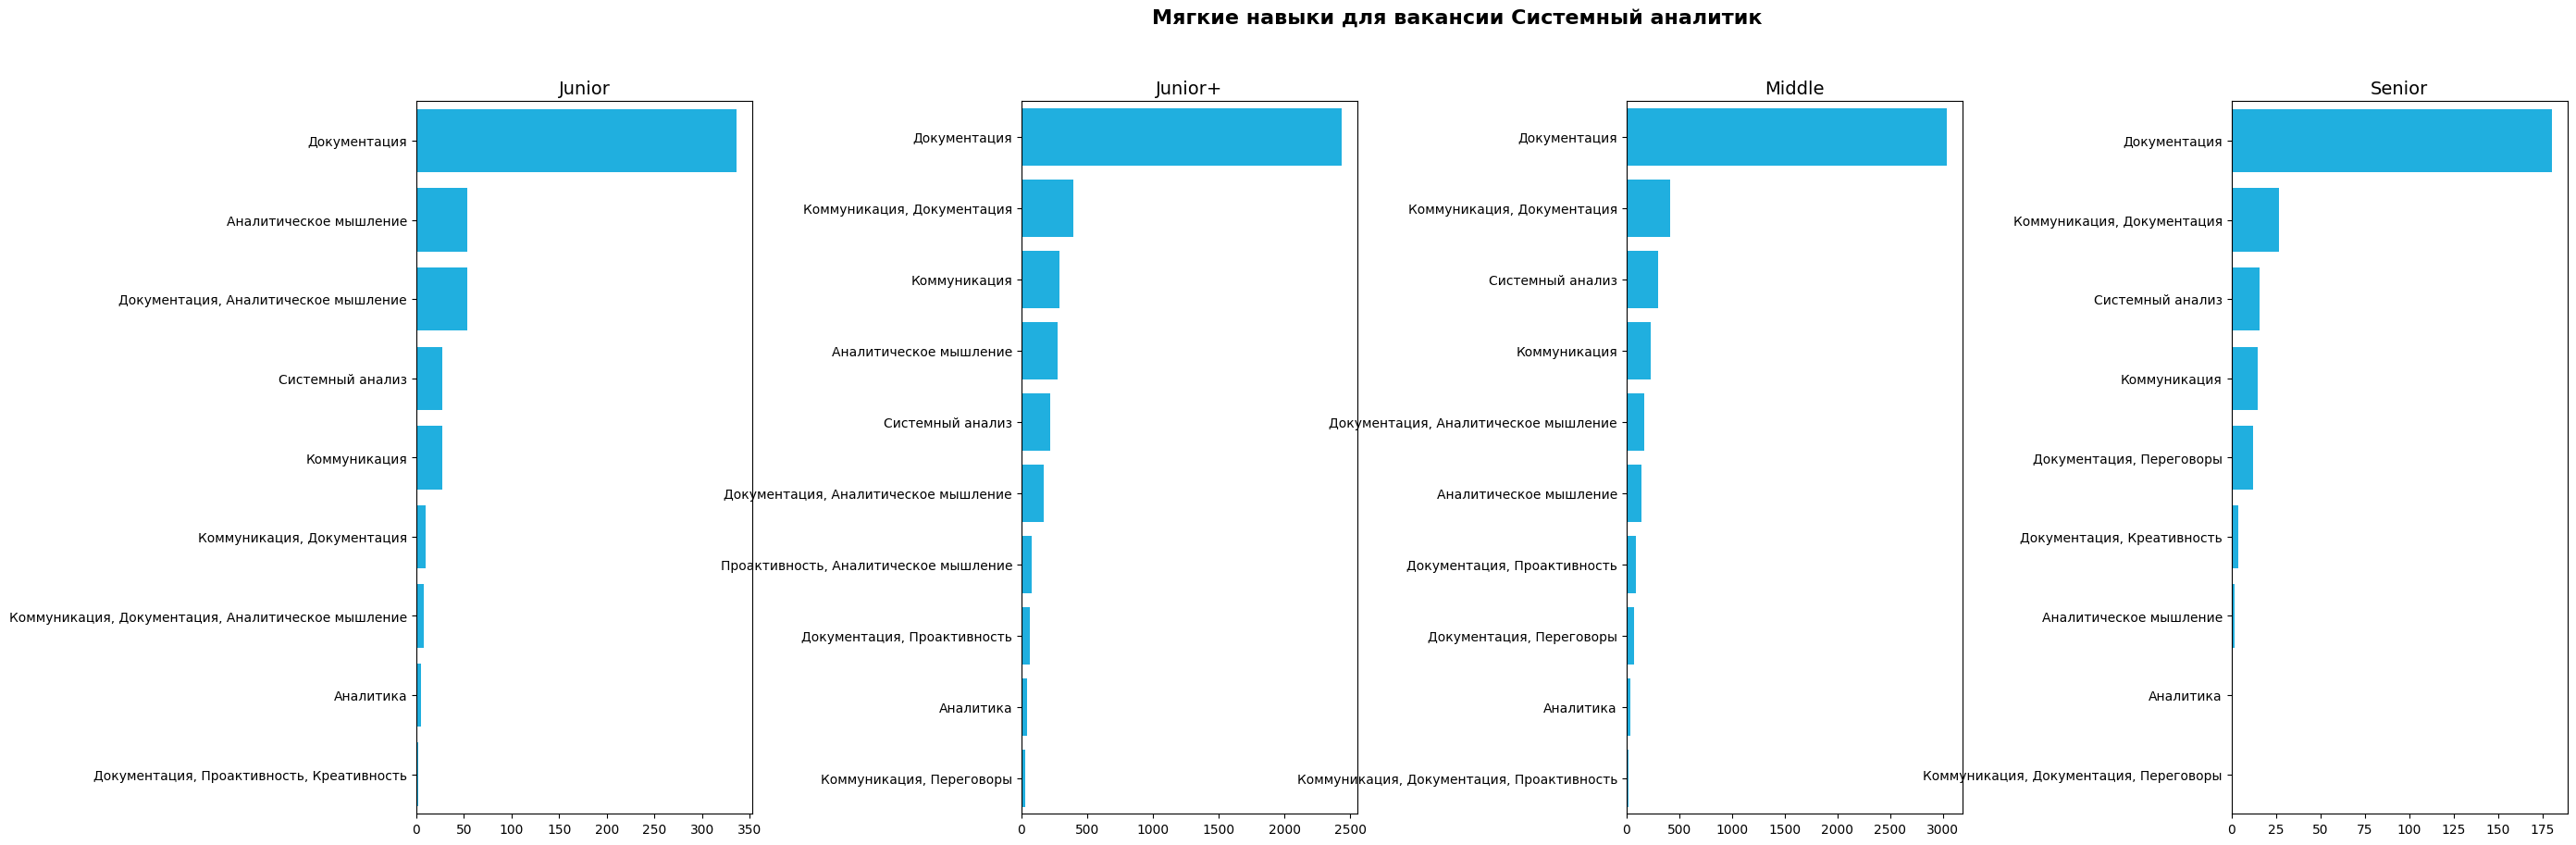

In [ ]:
# Построим диаграммы для вакансии Системный аналитик по мягким навыкам
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
plt.suptitle('Мягкие навыки для вакансии Системный аналитик', fontsize=16, fontweight='bold')
for i in range(len(grade)):
      sa_soft_skills = (
          vacancies_ex.loc[(vacancies_ex['v_type'] == 'sa') &
                                         (vacancies_ex['grade'] == f'{grade[i]}')
          , 'soft_skills_from_description'].value_counts().head(10)).reset_index()

# Строим график
      sns.barplot(x='count', y='soft_skills_from_description', data=sa_soft_skills, ax=ax[i], color='#00BFFF')
      ax[i].set_title(f"{grade[i]}", fontsize=14)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('')

plt.subplots_adjust(wspace = 0.8)
plt.show()

**Вывод по разделу:**

1. Для вакансии "Дата-аналитик" уровней Junior, Junior+ и Middle требуются следующие "жесткие" навыки:
- Pandas.
- SQL.
- Python.
- Анализ данных.
- MS Excel.
2. Для вакансии "Дата-аналитик" уровня Senior требуются следующие "жесткие" навыки:
- Юнит-экономика.
- Confluence.
- SQL.
- Python.
- Pandas.


3. Для вакансии "Системный аналитик" уровня Junior требуются следующие "жесткие" навыки:
- Confluence.
- SQL.
- Бизнес-анализ.
- BPMN.
- SQL.

4. Для вакансии "Системный аналитик" уровня Junior+ требуются следующие "жесткие" навыки:
- Confluence.
- BPMN.
- SQL.
- UML.
- REST.

5. Для вакансии "Системный аналитик" уровней Middle и Senior требуются следующие "жесткие" навыки:
- Confluence.
- SQL.
- BPMN.
- UML.
- REST.

6. Т.е. чем выше уровень специалиста, тем больше появляется требований к организации работы и проектированию процессов. Например, на начальных уровнях с системного аналитика требует знания основных нотаций, далее уже требования к проектированию (REST).

7. Для вакансии "Дата-аналитик" для всех уровней в подавляющем большинстве случаев требуются следующие мягкие навыки:
- Документация.
- Аналитическое мышление.
- Коммуникация.
- Проактивность.
- Презентация результатов.

8. Для вакансии "Системный аналитик" для всех уровней в подавляющем большинстве случаев требуются следующие мягкие навыки:
- Документация.
- Аналитическое мышление.
- Коммуникация.
- Системный анализ.

9. Следовательно, требования к мягким навыкам практически не различаются.

### Шаг 4 Результаты исследования



####Основная информация об исследуемых данных:

1. Количество записей в исследуемых данных составляет 3 716.
2. Тип столбцов и их наименования корректны и не требуют внесения изменений.
3. Полные дубликаты отсутствуют.
4. Удалены дубликаты (416) по всем столбцам за исключением идентификатора записи и даты публикации
5. Наименование всех вакансий приведены к нижнему регистру, удалены лидирующий и замыкающий пробел.
6. На основании столбца "Опыт работы" определен грейд вакансии.

####Требования к уровню соискателей:

1. Для вакансий "Дата-аналитик" требования по уровню соискателей распределяются следующим образом (в порядке убывания):
- Junior+: 61.1%
- Middle: 30.2%
- Junior: 7.94%
- Senior: 0.693%

2. Для вакансий "Системный аналитик" требования по уровню соискателей распределяются следующим образом (в порядке убывания):
- Middle: 48.8%
- Junior+: 44.5%
- Junior: 4.46%
- Senior: 2.31%

3. Наибольший интерес к соискателем с уровнем Junior+ и Middle обусловлен тем, что большая базовых задач выполняется данными специалистами и обучение соискателя, возможно, кажется легче, чем переучивания и высокие требования по зарплате у уровня Senior.
4. Наименьший интерес к соискателем с уровнем Senior скорее всего связан с меньшим кол-вом специалистов данного уровня в командах и повышения специалистов, уже работающих в компании.

####Требования к навыкам соискателей:
1. Основными работодателями являются компании: СБЕР, T1, Aston.
2. Типичные требования к соискателям на вакансии "Дата-аналитик" и "Системный аналитик" всех уровней:
- Заработная плата не указана.
- Полная занятость.
- Полный рабочий день или удаленная работа.

3. Мягкие навыки спрашивают чаще, чем жесткие.
4. Для вакансий Дата-аналитик и Системный аналитик больше всего требований к уровню Junior+ и Middle.
5. Для вакансии "Дата-аналитик" уровней Junior, Junior+ и Middle требуются следующие "жесткие" навыки:
- Pandas.
- SQL.
- Python.
- Анализ данных.
- MS Excel.

6. Для вакансии "Дата-аналитик" уровня Senior требуются следующие "жесткие" навыки:
- Юнит-экономика.
- Confluence.
- SQL.
- Python.
- Pandas.


7. Для вакансии "Системный аналитик" уровня Junior требуются следующие "жесткие" навыки:
- Confluence.
- SQL.
- Бизнес-анализ.
- BPMN.
- SQL.

8. Для вакансии "Системный аналитик" уровня Junior+ требуются следующие "жесткие" навыки:
- Confluence.
- BPMN.
- SQL.
- UML.
- REST.

9. Для вакансии "Системный аналитик" уровней Middle и Senior требуются следующие "жесткие" навыки:
- Confluence.
- SQL.
- BPMN.
- UML.
- REST.

10. Т.е. чем выше уровень специалиста, тем больше появляется требований к организации работы и проектированию процессов. Например, на начальных уровнях с системного аналитика требует знания основных нотаций, далее уже требования к проектированию (REST).

11. Для вакансии "Дата-аналитик" для всех уровней в подавляющем большинстве случаев требуются следующие мягкие навыки:
- Документация.
- Аналитическое мышление.
- Коммуникация.
- Проактивность.
- Презентация результатов.

12. Для вакансии "Системный аналитик" для всех уровней в подавляющем большинстве случаев требуются следующие мягкие навыки:
- Документация.
- Аналитическое мышление.
- Коммуникация.
- Системный анализ.

13. Следовательно, требования к мягким навыкам практически не различаются.